# 1. 환경설정

In [2]:
from matplotlib import pyplot as plt
from datetime import datetime as dt

import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import random
import warnings


warnings.filterwarnings('ignore')
# Pandas 데이터 프레임에서 float을 소수점 2자리 까지 출력해 준다.
pd.set_option('display.float_format', lambda x: '%.4f' % x)
# Pandas 데이터 프레임에서 column을 다 출력하도록 설정한다.
pd.set_option('display.max_columns', None)
# Pandas 데이터 프레임에서 row를 다 출력하도록 설정한다.
#pd.set_option('display.max_rows', None)


random.seed(3)

In [2]:
d1 = pd.read_csv('dataset/2020to2022.csv', encoding = 'cp949')
d2 = pd.read_csv('dataset/2023result_nothisweek.csv', encoding = 'cp949')

In [1076]:
d1 = pd.read_csv('dataset/2020to2022.csv', encoding = 'cp949')
d2 = pd.read_csv('dataset/2023result.csv', encoding = 'cp949')

# 2. 데이터 전처리

### 1) 데이터 병합

In [3]:
data = pd.concat([d1, d2], axis = 0)  # idx = ~22235까지 ~2022 // idx 22236~부터 2023
data = data.reset_index(drop=True)
# 날짜화
data['B_Date'] = pd.to_datetime(data['B_Date'], format = '%Y-%m-%d')

In [4]:
data.tail(13)

,B_Date,B_Place,B_Crowd,B_Ref,B_TeamScore,B_Team,B_OppTeam,B_isHome,B_HomeWin,B_AwayWin,B_Coach,C_Backnum,C_Name,C_Pos,C_Time,C_Rate,A_Score,A_Assist,A_Shoot,A_VShoot,A_BShoot,A_nonVShoot,A_PAShoot,A_nonPAShoot,A_Off,A_Free,A_Corner,A_Throw,A_DribSucNum,A_DribSucPer,P_PassSucNum,P_PassSucPer,P_Key,P_AASucNum,P_AASucPer,P_MASucNum,P_MASucPer,P_DASucNum,P_DASucPer,P_LongSucNum,P_LongSucPer,P_MidSucNum,P_MidSucPer,P_ShortSucNum,P_ShortSucPer,P_ForSucNum,P_ForSucPer,P_SidSucNum,P_SidSucPer,P_BackSucNum,P_BackSucPer,P_CrossSucNum,P_CrossSucPer,P_PR,D_GroundSucNum,D_GroundSucPer,D_AirSucNum,D_AirSucPer,D_TackSucNum,D_TackSucPer,D_Clear,D_Inter,D_Shut,D_Gain,D_Block,D_Miss,D_Foul,D_GainFoul,D_Yellow,D_Red,G_Loss,G_Catch,G_Punch,G_KickSucNum,G_KickSucPer,G_AirSucNum,G_AirSucPer
28484,2023-09-03,제주 월드컵,"8,104",김우성,0,전북,제주,0,0,0,페트레스쿠,4,박진섭,MF,100,7.2000,0,0,2,0,0,2,0,2,0,2,0,0,0,0.0000,55,89,0,4,80.0000,0,0,17,85.0000,9,75.0000,18,90.0000,28,93.3000,31,83.8000,23,95.8000,1,100.0000,0,0.0000,1,1,50.0000,8,88.9000,2,40.0000,8,4,NaN,4,5,4,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28485,2023-09-03,제주 월드컵,"8,104",김우성,0,전북,제주,0,0,0,페트레스쿠,8,백승호,FW,82,6.8000,0,0,0,0,0,0,0,0,0,2,5,1,0,0.0000,46,88,1,5,83.3000,0,0,10,100.0000,5,100.0000,12,80.0000,29,90.6000,15,71.4000,21,100.0000,10,100.0000,2,28.6000,0,1,25.0000,1,100.0000,1,20.0000,1,2,NaN,0,6,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28486,2023-09-03,제주 월드컵,"8,104",김우성,0,전북,제주,0,0,0,페트레스쿠,57,보아텡,MF,71,6.6000,0,0,2,0,0,2,2,0,0,0,0,3,2,50.0000,35,81,0,5,83.3000,0,0,3,60.0000,2,33.3000,17,85.0000,16,94.1000,11,68.8000,14,87.5000,10,90.9000,0,0.0000,0,0,0.0000,2,66.7000,3,60.0000,1,2,NaN,3,4,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28487,2023-09-03,제주 월드컵,"8,104",김우성,0,전북,제주,0,0,0,페트레스쿠,19,하파 실바,MF,47,6.2000,0,0,2,1,1,0,1,1,0,0,0,0,0,0.0000,9,75,0,1,33.3000,0,0,0,0.0000,0,0.0000,2,66.7000,7,77.8000,1,50.0000,2,66.7000,6,85.7000,0,0.0000,0,0,0.0000,0,0.0000,2,100.0000,1,1,NaN,1,2,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28488,2023-09-03,제주 월드컵,"8,104",김우성,0,전북,제주,0,0,0,페트레스쿠,27,문선민,MF,100,7.0000,0,0,5,1,1,3,4,1,1,0,0,0,2,50.0000,13,81,2,7,70.0000,0,0,0,0.0000,0,0.0000,3,100.0000,10,76.9000,4,80.0000,4,66.7000,5,100.0000,1,33.3000,0,0,0.0000,0,0.0000,1,33.3000,0,0,NaN,0,5,1,1,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28489,2023-09-03,제주 월드컵,"8,104",김우성,0,전북,제주,0,0,0,페트레스쿠,9,구스타보,FW,59,6.4000,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0000,4,57,0,1,50.0000,0,0,0,0.0000,0,0.0000,1,100.0000,3,50.0000,2,50.0000,1,50.0000,1,100.0000,0,0.0000,0,0,0.0000,1,14.3000,0,0.0000,2,0,NaN,1,2,0,1,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28490,2023-09-03,제주 월드컵,"8,104",김우성,0,전북,제주,0,0,0,페트레스쿠,10,박재용,대기,41,6.2000,0,0,1,0,0,1,1,0,0,0,0,0,0,0.0000,7,64,0,1,25.0000,0,0,1,100.0000,0,0.0000,0,0.0000,7,70.0000,0,0.0000,4,57.1000,3,100.0000,0,0.0000,0,1,50.0000,5,50.0000,0,0.0000,0,0,NaN,0,2,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28491,2023-09-03,제주 월드컵,"8,104",김우성,0,전북,제주,0,0,0,페트레스쿠,15,구자룡,대기,18,6.4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,7,100,0,0,0.0000,0,0,1,100.0000,1,100.0000,3,100.0000,3,100.0000,2,100.0000,5,100.0000,0,0.0000,0,0.0000,0,1,100.0000,1,50.0000,0,0.0000,0,1,NaN,1,1,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28492,2023-09-03,제주 월드컵,"8,104",김우성,0,전북,제주,0,0,0,페트레스쿠,17,송민규,대기,53,7.0000,0,0,3,1,1,1,3,0,0,0,0,1,0,0.0000,10,83,0,4,100.0000,0,0,0,0.0000,1,50.0000,1,100.0000,8,88.9000,2,66.7000,4,80.0000,4,100.0000,0,0.0000,0,0,0.0000,0,0.0000,2,100.0000,0,1,NaN,0,2,1,0,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28493,2023-09-03,제주 월드컵,"8,104",김우성,0,전북,제주,0,0,0,페트레스쿠,21,아마노 준,대기,29,6.4000,0,0,1,0,1,0,0,1,0,1,1,0,0,0.0000,19,86,0,6,100.0000,0,0,0,0.0000,0,0.0000,4,80.0000,15,93.8000,7,70.0000,5,100.0000,7,100.0000,0,0.0000,0,0,0.0000,0,0.0000,0,0.0000,0,0,NaN,0,1,0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2) 데이터 순서 보존

In [5]:
#### 데이터 순서 빠그러지지 않게 해주는 변수
data['Order'] = np.ones((len(data),1))
order = 1
idx = 1
while True:
    try:
        t1 = data['B_Team'][idx]
        t2 = data['B_Team'][idx-1]
        t3 = data['B_Date'][idx]
        t4 = data['B_Date'][idx-1]
        if t1 == t2 and t3==t4:
            data['Order'][idx] = order
        else:
            order += 1
            data['Order'][idx] = order
        idx += 1
    except:
        print('끝')
        break

끝


### 3) 사전 논의 컬럼 제거

In [6]:
'''
변수 제거사항
## B 계열
'B_Place', 'B_Crowd'
## C 계열(Name은 Groupby 시 구분 용으로만 쓰고 지워야함)
'C_Name', 'C_Backnum', 'C_Pos', 'C_Time'
## A 계열

## G 계열

'''
data.drop(['B_Place', 'B_Crowd', 'C_Name',
           'C_Backnum', 'C_Pos', 'C_Time'], axis = 1, inplace = True) 
# 선행적 예측에서는 B_HomeWin, B_AwayWin, C_Rate, A_Score, A_Assist, G_Loss 활용

### 4) 백분위 컬럼 분모 복원

In [7]:
PerCol = ['A_DribSucPer', 'P_PassSucPer', 'P_AASucPer', 'P_MASucPer', 'P_DASucPer', 'P_LongSucPer',
         'P_MidSucPer', 'P_ShortSucPer', 'P_ForSucPer', 'P_SidSucPer', 'P_BackSucPer', 'P_CrossSucPer',
         'D_GroundSucPer', 'D_AirSucPer', 'D_TackSucPer', 
         'G_KickSucPer', 'G_AirSucPer']
for col in PerCol:
    data[col[:-6]+'Trial'] = np.ones((len(data), 1))
for col in enumerate(data.columns):
    print(col)
    
PerNum = [23,25,28,30,32,34,36,38,40,42,44,46,49,51,53,68,70]
print(len(PerCol))
print(len(PerNum))

for n in PerNum:
    nlist = list()
    for i in range(len(data)):
        try:
            nlist.append(round((100*data[data.columns[n-1]].loc[i].values[0]/a)))
        except:
            nlist.append(0)
    data[data.columns[n][:-6]+'Trial'] = nlist
data.drop(PerCol, axis = 1, inplace = True)
data = data.fillna(0)

(0, 'B_Date')
(1, 'B_Ref')
(2, 'B_TeamScore')
(3, 'B_Team')
(4, 'B_OppTeam')
(5, 'B_isHome')
(6, 'B_HomeWin')
(7, 'B_AwayWin')
(8, 'B_Coach')
(9, 'C_Rate')
(10, 'A_Score')
(11, 'A_Assist')
(12, 'A_Shoot')
(13, 'A_VShoot')
(14, 'A_BShoot')
(15, 'A_nonVShoot')
(16, 'A_PAShoot')
(17, 'A_nonPAShoot')
(18, 'A_Off')
(19, 'A_Free')
(20, 'A_Corner')
(21, 'A_Throw')
(22, 'A_DribSucNum')
(23, 'A_DribSucPer')
(24, 'P_PassSucNum')
(25, 'P_PassSucPer')
(26, 'P_Key')
(27, 'P_AASucNum')
(28, 'P_AASucPer')
(29, 'P_MASucNum')
(30, 'P_MASucPer')
(31, 'P_DASucNum')
(32, 'P_DASucPer')
(33, 'P_LongSucNum')
(34, 'P_LongSucPer')
(35, 'P_MidSucNum')
(36, 'P_MidSucPer')
(37, 'P_ShortSucNum')
(38, 'P_ShortSucPer')
(39, 'P_ForSucNum')
(40, 'P_ForSucPer')
(41, 'P_SidSucNum')
(42, 'P_SidSucPer')
(43, 'P_BackSucNum')
(44, 'P_BackSucPer')
(45, 'P_CrossSucNum')
(46, 'P_CrossSucPer')
(47, 'P_PR')
(48, 'D_GroundSucNum')
(49, 'D_GroundSucPer')
(50, 'D_AirSucNum')
(51, 'D_AirSucPer')
(52, 'D_TackSucNum')
(53, 'D_TackSucP

### 5) 팀 단위 데이터 생성

In [ ]:
df = data.groupby(['B_Date', 'B_Team', 'B_OppTeam']).agg({
    'B_Ref':'unique', 'B_TeamScore':'unique', 'B_isHome':'unique',
    'B_HomeWin':'unique', 'B_AwayWin':'unique', 'B_Coach':'unique',
    'C_Rate':'mean','A_Score':'sum', 'A_Assist':'sum',
    'A_Shoot':'sum', 'A_VShoot':'sum', 'A_BShoot':'sum', 
    'A_nonVShoot':'sum','A_PAShoot':'sum', 'A_nonPAShoot':'sum', 'A_Off':'sum', 
    'A_Free':'sum', 'A_Corner':'sum', 'A_Throw':'sum','A_DribSucNum':'sum', 'A_DribTrial':'sum',
    'P_PassTrial':'sum', 'P_PassSucNum':'sum', 'P_Key':'sum', 'P_AASucNum':'sum', 'P_AATrial':'sum',
    'P_MASucNum':'sum', 'P_MATrial':'sum', 'P_DASucNum':'sum', 'P_DATrial':'sum' ,
    'P_LongSucNum':'sum', 'P_LongTrial':'sum', 'P_MidSucNum':'sum', 'P_MidTrial':'sum', 
    'P_ShortSucNum':'sum', 'P_ShortTrial':'sum','P_ForSucNum':'sum', 'P_ForTrial':'sum', 
    'P_SidSucNum':'sum', 'P_SidTrial':'sum', 'P_BackSucNum':'sum', 'P_BackTrial':'sum', 
    'P_CrossSucNum':'sum',  'P_CrossTrial':'sum','P_PR':'sum', 
    'D_GroundSucNum':'sum', 'D_GroundTrial':'sum', 'D_AirSucNum':'sum', 'D_AirTrial':'sum', 
    'D_TackSucNum':'sum', 'D_TackTrial':'sum', 'D_Clear':'sum', 'D_Inter':'sum',
    'D_Shut':'sum', 'D_Gain':'sum', 'D_Block':'sum', 
    'D_Miss':'sum', 'D_Foul':'sum', 'D_GainFoul':'sum','D_Yellow':'sum', 'D_Red':'sum', 
    'G_Loss':'sum', 'G_Catch':'sum', 'G_Punch':'sum', 'G_KickSucNum':'sum', 'G_KickTrial':'sum', 
    'G_AirSucNum':'sum', 'G_AirTrial':'sum',
    'Order':'mean'
}).reset_index()

In [ ]:
Collist = ['B_Ref', 'B_TeamScore', 'B_isHome', 'B_HomeWin', 'B_AwayWin', 'B_Coach']
for col in Collist:
    for i in range(len(df)):
        df[col].loc[i] = str(df[col].loc[i])[1:-1]
Collist = ['B_Ref', 'B_Coach']
for col in Collist:
    for i in range(len(df)):
        df[col].loc[i] = str(df[col].loc[i])[1:-1]
data = df

### 6) 데이터 순서 조정

In [ ]:
data = data.sort_values(by='Order', axis = 0, ascending = True)
data = data.reset_index(drop = True)
#data.drop('Order', axis = 1, inplace = True)
count = 0
idx = list()
for i in range(len(data)):
    ht = data.iloc[i,1]
    at = data.iloc[i,2]
    if ht==at:
        count+=1
        idx.append(i)
print(count)
print(idx)

In [1085]:
### 12개 데이터가 홈팀과 어웨이 팀이 같음 
### 확인결과 단순 데이터 중복
data.drop(idx, axis = 0, inplace = True)
data = data.reset_index(drop = True)
data.shape

(1596, 72)

In [1086]:
for i in range(len(data)):
    data.iloc[i,4] = int(float(data.iloc[i,4]))
    data.iloc[i,5] = int(float(data.iloc[i,5]))
    data.iloc[i,6] = int(float(data.iloc[i,6]))
    data.iloc[i,7] = int(float(data.iloc[i,7]))

In [1087]:
data.to_csv('20202023ForDividend20230907.csv', header = True, index = False, encoding = 'cp949')

# 배당률 데이터 불러오기

In [3]:
data = pd.read_csv('dataset/20202023ForDividend20230907.csv', encoding = 'cp949')

In [4]:
len(data)==data['Proto'].nunique()

True

In [5]:
data.tail(13)

,B_Date,B_Team,B_OppTeam,Proto,WinDiv,DrawDiv,B_Ref,B_TeamScore,B_isHome,B_HomeWin,B_AwayWin,B_Coach,C_Rate,A_Score,A_Assist,A_Shoot,A_VShoot,A_BShoot,A_nonVShoot,A_PAShoot,A_nonPAShoot,A_Off,A_Free,A_Corner,A_Throw,A_DribSucNum,A_DribTrial,P_PassTrial,P_PassSucNum,P_Key,P_AASucNum,P_AATrial,P_MASucNum,P_MATrial,P_DASucNum,P_DATrial,P_LongSucNum,P_LongTrial,P_MidSucNum,P_MidTrial,P_ShortSucNum,P_ShortTrial,P_ForSucNum,P_ForTrial,P_SidSucNum,P_SidTrial,P_BackSucNum,P_BackTrial,P_CrossSucNum,P_CrossTrial,P_PR,D_GroundSucNum,D_GroundTrial,D_AirSucNum,D_AirTrial,D_TackSucNum,D_TackTrial,D_Clear,D_Inter,D_Shut,D_Gain,D_Block,D_Miss,D_Foul,D_GainFoul,D_Yellow,D_Red,G_Loss,G_Catch,G_Punch,G_KickSucNum,G_KickTrial,G_AirSucNum,G_AirTrial,Order
1583,2023-09-03,전북,제주,2399.7620,2.1200,3.2500,김우성,0,0,0,0,페트레스쿠,5.9111,0.0000,0.0000,17.0000,3.0000,4.0000,10.0000,12.0000,5.0000,2.0000,8.0000,6.0000,22.0000,4.0000,0.0000,0.0000,390.0000,5.0000,60.0000,0.0000,0.0000,0.0000,98.0000,0.0000,36.0000,0.0000,139.0000,0.0000,215.0000,0.0000,144.0000,0.0000,162.0000,0.0000,84.0000,0.0000,4.0000,0.0000,2.0000,9.0000,0.0000,29.0000,0.0000,15.0000,0.0000,35.0000,28.0000,0.0000,21.0000,49.0000,11.0000,4.0000,12.0000,8.0000,0.0000,0.0000,3.0000,0.0000,9.0000,0.0000,1.0000,0.0000,1584.0000
1584,2023-09-16,전북,강원,2399.8110,1.5910,4.1500,채상협,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1585,2023-09-16,강원,전북,2399.8120,5.9700,4.1500,채상협,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1586,2023-09-16,인천,제주,2399.8210,2.7000,3.5300,김희곤,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1587,2023-09-16,제주,인천,2399.8220,2.6400,3.5300,김희곤,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1588,2023-09-16,포항,수원FC,2399.8310,1.5020,4.7300,이동준,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1589,2023-09-16,수원FC,포항,2399.8320,6.2000,4.7300,이동준,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1590,2023-09-16,울산,대전,2399.8410,1.5640,4.4900,김대용,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591,2023-09-16,대전,울산,2399.8420,5.6800,4.4900,김대용,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1592,2023-09-17,서울,광주,2399.8510,2.3400,3.3600,김용우,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
data = data.iloc[:1584,:]

In [17]:
homedata = data[data['B_isHome']==1]

In [19]:
homedata

,B_Date,B_Team,B_OppTeam,Proto,WinDiv,DrawDiv,B_Ref,B_TeamScore,B_isHome,B_HomeWin,B_AwayWin,B_Coach,C_Rate,A_Score,A_Assist,A_Shoot,A_VShoot,A_BShoot,A_nonVShoot,A_PAShoot,A_nonPAShoot,A_Off,A_Free,A_Corner,A_Throw,A_DribSucNum,A_DribTrial,P_PassTrial,P_PassSucNum,P_Key,P_AASucNum,P_AATrial,P_MASucNum,P_MATrial,P_DASucNum,P_DATrial,P_LongSucNum,P_LongTrial,P_MidSucNum,P_MidTrial,P_ShortSucNum,P_ShortTrial,P_ForSucNum,P_ForTrial,P_SidSucNum,P_SidTrial,P_BackSucNum,P_BackTrial,P_CrossSucNum,P_CrossTrial,P_PR,D_GroundSucNum,D_GroundTrial,D_AirSucNum,D_AirTrial,D_TackSucNum,D_TackTrial,D_Clear,D_Inter,D_Shut,D_Gain,D_Block,D_Miss,D_Foul,D_GainFoul,D_Yellow,D_Red,G_Loss,G_Catch,G_Punch,G_KickSucNum,G_KickTrial,G_AirSucNum,G_AirTrial,Order
0,2020-05-08,전북,수원,2024.1100,1.4200,3.9000,김우성,1,1,1,0,조세 모라이스,4.8333,1.0000,1.0000,17.0000,5.0000,4.0000,8.0000,8.0000,9.0000,1.0000,12.0000,7.0000,18.0000,1.0000,0.0000,0.0000,591.0000,9.0000,156.0000,0.0000,0.0000,0.0000,105.0000,0.0000,45.0000,0.0000,189.0000,0.0000,357.0000,0.0000,216.0000,0.0000,235.0000,0.0000,140.0000,0.0000,9.0000,0.0000,0.0000,16.0000,0.0000,30.0000,0.0000,5.0000,0.0000,15.0000,12.0000,0.0000,21.0000,96.0000,2.0000,4.0000,14.0000,10.0000,1.0000,0.0000,0.0000,0.0000,6.0000,0.0000,0.0000,0.0000,1.0000
2,2020-05-09,울산,상주,2024.2100,1.4700,3.7500,이동준,4,1,1,0,김도훈,5.7375,4.0000,3.0000,13.0000,5.0000,4.0000,4.0000,7.0000,6.0000,5.0000,7.0000,5.0000,12.0000,0.0000,0.0000,0.0000,376.0000,9.0000,64.0000,0.0000,0.0000,0.0000,148.0000,0.0000,43.0000,0.0000,150.0000,0.0000,183.0000,0.0000,124.0000,0.0000,166.0000,0.0000,86.0000,0.0000,6.0000,0.0000,1.0000,24.0000,0.0000,23.0000,0.0000,6.0000,0.0000,15.0000,6.0000,0.0000,52.0000,75.0000,3.0000,5.0000,22.0000,5.0000,1.0000,0.0000,2.0000,0.0000,8.0000,0.0000,1.0000,0.0000,3.0000
4,2020-05-09,인천,대구,2024.3100,3.4000,3.0500,김희곤,0,1,0,0,임완섭,4.7778,0.0000,0.0000,10.0000,1.0000,3.0000,6.0000,4.0000,6.0000,0.0000,14.0000,2.0000,23.0000,3.0000,0.0000,0.0000,400.0000,5.0000,41.0000,0.0000,0.0000,0.0000,100.0000,0.0000,33.0000,0.0000,158.0000,0.0000,209.0000,0.0000,128.0000,0.0000,165.0000,0.0000,107.0000,0.0000,2.0000,0.0000,1.0000,27.0000,0.0000,15.0000,0.0000,12.0000,0.0000,33.0000,12.0000,0.0000,29.0000,77.0000,2.0000,4.0000,10.0000,10.0000,2.0000,0.0000,3.0000,2.0000,2.0000,0.0000,0.0000,0.0000,5.0000
6,2020-05-09,광주,성남,2024.4100,2.2700,2.9500,김대용,0,1,0,1,박진섭,4.6111,0.0000,0.0000,10.0000,1.0000,4.0000,5.0000,4.0000,6.0000,2.0000,21.0000,10.0000,35.0000,0.0000,0.0000,0.0000,451.0000,5.0000,115.0000,0.0000,0.0000,0.0000,86.0000,0.0000,61.0000,0.0000,171.0000,0.0000,219.0000,0.0000,155.0000,0.0000,193.0000,0.0000,103.0000,0.0000,7.0000,0.0000,0.0000,21.0000,0.0000,19.0000,0.0000,6.0000,0.0000,11.0000,26.0000,0.0000,39.0000,87.0000,0.0000,4.0000,10.0000,17.0000,2.0000,2.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,7.0000
8,2020-05-10,포항,부산,2024.5100,1.6400,3.4000,김용우,2,1,1,0,김기동,5.0000,2.0000,1.0000,15.0000,6.0000,3.0000,6.0000,10.0000,5.0000,1.0000,9.0000,4.0000,13.0000,2.0000,0.0000,0.0000,323.0000,10.0000,82.0000,0.0000,0.0000,0.0000,75.0000,0.0000,42.0000,0.0000,101.0000,0.0000,180.0000,0.0000,117.0000,0.0000,119.0000,0.0000,87.0000,0.0000,10.0000,0.0000,2.0000,17.0000,0.0000,31.0000,0.0000,8.0000,0.0000,23.0000,12.0000,0.0000,33.0000,94.0000,6.0000,5.0000,20.0000,9.0000,2.0000,0.0000,1.0000,0.0000,5.0000,0.0000,3.0000,0.0000,9.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,2023-09-01,대구,강원,2399.7210,1.8600,3.1500,김종혁,1,1,1,0,최원권,6.0333,1.0000,1.0000,12.0000,6.0000,1.0000,5.0000,7.0000,5.0000,2.0000,10.0000,4.0000,20.0000,6.0000,0.0000,0.0000,322.0000,10.0000,67.0000,0.0000,0.0000,0.0000,87.0000,0.0000,32.0000,0.0000,113.0000,0.0000,177.0000,0.0000,120.0000,0.0000,128.0000,0.00

In [21]:
teams = ['울산', '포항', '서울', '전북', '광주', '대전', '대구', '인천', '제주', '수원FC', '수원', '강원',
        '성남', '상주', '김천', '상무', '부산']

In [20]:
homedata[homedata['B_Team']=='울산'].shape

(66, 75)

In [25]:
totalgames = []
for i in range(len(teams)):
    a = homedata[homedata['B_Team']==teams[i]].shape[0]
    b = homedata[homedata['B_OppTeam']==teams[i]].shape[0]
    print(teams[i],'홈 경기 수:',a)
    print(teams[i],'어웨이 경기 수:',b)
    print(teams[i],'총 경기 수:',a+b)
    totalgames.append(a+b)
    print('----------------------------')
    
print('total =',sum(totalgames))

울산 홈 경기 수: 66
울산 어웨이 경기 수: 66
울산 총 경기 수: 132
----------------------------
포항 홈 경기 수: 67
포항 어웨이 경기 수: 65
포항 총 경기 수: 132
----------------------------
서울 홈 경기 수: 67
서울 어웨이 경기 수: 65
서울 총 경기 수: 132
----------------------------
전북 홈 경기 수: 67
전북 어웨이 경기 수: 65
전북 총 경기 수: 132
----------------------------
광주 홈 경기 수: 46
광주 어웨이 경기 수: 48
광주 총 경기 수: 94
----------------------------
대전 홈 경기 수: 14
대전 어웨이 경기 수: 15
대전 총 경기 수: 29
----------------------------
대구 홈 경기 수: 65
대구 어웨이 경기 수: 67
대구 총 경기 수: 132
----------------------------
인천 홈 경기 수: 66
인천 어웨이 경기 수: 66
인천 총 경기 수: 132
----------------------------
제주 홈 경기 수: 51
제주 어웨이 경기 수: 54
제주 총 경기 수: 105
----------------------------
수원FC 홈 경기 수: 53
수원FC 어웨이 경기 수: 52
수원FC 총 경기 수: 105
----------------------------
수원 홈 경기 수: 67
수원 어웨이 경기 수: 65
수원 총 경기 수: 132
----------------------------
강원 홈 경기 수: 66
강원 어웨이 경기 수: 66
강원 총 경기 수: 132
----------------------------
성남 홈 경기 수: 52
성남 어웨이 경기 수: 51
성남 총 경기 수: 103
----------------------------
상주 홈 경기 수: 13
상주 어웨이 경기 수: 14
상주 총

In [35]:
df0 = data[data['B_Date']<'2021-01-01'] 
df1 = data[data['B_Date']>='2021-01-01'] 
df1 = df1[df1['B_Date']<'2022-01-01'] 
df2 = data[data['B_Date']>='2022-01-01'] 
df2 = df2[df2['B_Date']<'2023-01-01'] 
df3 = data[data['B_Date']>='2023-01-01'] 

In [39]:
df3.shape

(348, 75)

In [40]:
320+456+456+348

1580

In [42]:
348/2

174.0

In [46]:
import sys

print("--sys.version--")
print(sys.version)

--sys.version--
3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


In [47]:
data

,B_Date,B_Team,B_OppTeam,Proto,WinDiv,DrawDiv,B_Ref,B_TeamScore,B_isHome,B_HomeWin,B_AwayWin,B_Coach,C_Rate,A_Score,A_Assist,A_Shoot,A_VShoot,A_BShoot,A_nonVShoot,A_PAShoot,A_nonPAShoot,A_Off,A_Free,A_Corner,A_Throw,A_DribSucNum,A_DribTrial,P_PassTrial,P_PassSucNum,P_Key,P_AASucNum,P_AATrial,P_MASucNum,P_MATrial,P_DASucNum,P_DATrial,P_LongSucNum,P_LongTrial,P_MidSucNum,P_MidTrial,P_ShortSucNum,P_ShortTrial,P_ForSucNum,P_ForTrial,P_SidSucNum,P_SidTrial,P_BackSucNum,P_BackTrial,P_CrossSucNum,P_CrossTrial,P_PR,D_GroundSucNum,D_GroundTrial,D_AirSucNum,D_AirTrial,D_TackSucNum,D_TackTrial,D_Clear,D_Inter,D_Shut,D_Gain,D_Block,D_Miss,D_Foul,D_GainFoul,D_Yellow,D_Red,G_Loss,G_Catch,G_Punch,G_KickSucNum,G_KickTrial,G_AirSucNum,G_AirTrial,Order
0,2020-05-08,전북,수원,2024.1100,1.4200,3.9000,김우성,1,1,1,0,조세 모라이스,4.8333,1.0000,1.0000,17.0000,5.0000,4.0000,8.0000,8.0000,9.0000,1.0000,12.0000,7.0000,18.0000,1.0000,0.0000,0.0000,591.0000,9.0000,156.0000,0.0000,0.0000,0.0000,105.0000,0.0000,45.0000,0.0000,189.0000,0.0000,357.0000,0.0000,216.0000,0.0000,235.0000,0.0000,140.0000,0.0000,9.0000,0.0000,0.0000,16.0000,0.0000,30.0000,0.0000,5.0000,0.0000,15.0000,12.0000,0.0000,21.0000,96.0000,2.0000,4.0000,14.0000,10.0000,1.0000,0.0000,0.0000,0.0000,6.0000,0.0000,0.0000,0.0000,1.0000
1,2020-05-08,수원,전북,2024.1200,5.3000,3.9000,김우성,0,0,1,0,이임생,4.6333,0.0000,0.0000,6.0000,0.0000,2.0000,4.0000,1.0000,5.0000,1.0000,15.0000,0.0000,12.0000,1.0000,0.0000,0.0000,362.0000,3.0000,42.0000,0.0000,0.0000,0.0000,102.0000,0.0000,47.0000,0.0000,106.0000,0.0000,209.0000,0.0000,127.0000,0.0000,137.0000,0.0000,98.0000,0.0000,5.0000,0.0000,3.0000,17.0000,0.0000,21.0000,0.0000,11.0000,0.0000,31.0000,14.0000,0.0000,40.0000,71.0000,4.0000,6.0000,12.0000,13.0000,1.0000,1.0000,4.0000,0.0000,6.0000,0.0000,1.0000,0.0000,2.0000
2,2020-05-09,울산,상주,2024.2100,1.4700,3.7500,이동준,4,1,1,0,김도훈,5.7375,4.0000,3.0000,13.0000,5.0000,4.0000,4.0000,7.0000,6.0000,5.0000,7.0000,5.0000,12.0000,0.0000,0.0000,0.0000,376.0000,9.0000,64.0000,0.0000,0.0000,0.0000,148.0000,0.0000,43.0000,0.0000,150.0000,0.0000,183.0000,0.0000,124.0000,0.0000,166.0000,0.0000,86.0000,0.0000,6.0000,0.0000,1.0000,24.0000,0.0000,23.0000,0.0000,6.0000,0.0000,15.0000,6.0000,0.0000,52.0000,75.0000,3.0000,5.0000,22.0000,5.0000,1.0000,0.0000,2.0000,0.0000,8.0000,0.0000,1.0000,0.0000,3.0000
3,2020-05-09,상주,울산,2024.2200,4.9500,3.7500,이동준,0,0,1,0,김태완,4.8500,0.0000,0.0000,10.0000,2.0000,3.0000,5.0000,3.0000,7.0000,3.0000,27.0000,2.0000,21.0000,1.0000,0.0000,0.0000,423.0000,6.0000,101.0000,0.0000,0.0000,0.0000,94.0000,0.0000,30.0000,0.0000,133.0000,0.0000,260.0000,0.0000,166.0000,0.0000,144.0000,0.0000,113.0000,0.0000,7.0000,0.0000,1.0000,17.0000,0.0000,22.0000,0.0000,6.0000,0.0000,15.0000,12.0000,0.0000,32.0000,73.0000,4.0000,5.0000,5.0000,21.0000,1.0000,4.0000,0.0000,1.0000,4.0000,0.0000,0.0000,0.0000,4.0000
4,2020-05-09,인천,대구,2024.3100,3.4000,3.0500,김희곤,0,1,0,0,임완섭,4.7778,0.0000,0.0000,10.0000,1.0000,3.0000,6.0000,4.0000,6.0000,0.0000,14.0000,2.0000,23.0000,3.0000,0.0000,0.0000,400.0000,5.0000,41.0000,0.0000,0.0000,0.0000,100.0000,0.0000,33.0000,0.0000,158.0000,0.0000,209.0000,0.0000,128.0000,0.0000,165.0000,0.0000,107.0000,0.0000,2.0000,0.0000,1.0000,27.0000,0.0000,15.0000,0.0000,12.0000,0.0000,33.0000,12.0000,0.0000,29.0000,77.0000,2.0000,4.0000,10.0000,10.0000,2.0000,0.0000,3.0000,2.0000,2.0000,0.0000,0.0000,0.0000,5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2023-09-02,포항,인천,2399.7420,2.1700,3.1500,김희곤,2,0,0,1,김기동,5.7667,2.0000,0.0000,10.0000,3.0000,5.0000,2.0000,5.0000,5.0000,1.0000,10.0000,9.0000,24.0000,2.0000,0.0000,0.0000,435.0000,4.0000,60.0000,0.0000,0.0000,0.0000,81.0000,0.0000,41.0000,0.0000,184.0000,0.0000,210.0000,0.0000,133.0000,0.0000,202.0000,0.0000,

### 7) 홈 팀 데이터 이어 붙이기

##### Ver 1) 해당 경기 배당률만

In [7]:
collist = ['B_TeamScore', 'B_HomeWin', 'B_AwayWin', 'C_Rate',
           'A_Score', 'A_Assist', 'A_Shoot',
           'A_VShoot', 'A_BShoot', 'A_nonVShoot',
           'A_PAShoot', 'A_nonPAShoot', 'A_Off', 'A_Free', 'A_Corner', 'A_Throw',
           'A_DribSucNum', 'A_DribTrial', 'P_PassTrial', 'P_PassSucNum', 'P_Key',
           'P_AASucNum', 'P_AATrial', 'P_MASucNum', 'P_MATrial', 'P_DASucNum',
           'P_DATrial', 'P_LongSucNum', 'P_LongTrial', 'P_MidSucNum', 'P_MidTrial',
           'P_ShortSucNum', 'P_ShortTrial', 'P_ForSucNum', 'P_ForTrial',
           'P_SidSucNum', 'P_SidTrial', 'P_BackSucNum', 'P_BackTrial',
           'P_CrossSucNum', 'P_CrossTrial', 'P_PR', 'D_GroundSucNum',
           'D_GroundTrial', 'D_AirSucNum', 'D_AirTrial', 'D_TackSucNum',
           'D_TackTrial', 'D_Clear', 'D_Inter', 'D_Shut', 'D_Gain', 'D_Block',
           'D_Miss', 'D_Foul', 'D_GainFoul', 'D_Yellow', 'D_Red', 'G_Loss', 'G_Catch',
           'G_Punch', 'G_KickSucNum', 'G_KickTrial', 'G_AirSucNum', 'G_AirTrial']

for col in collist:
    data[col+'_1'] = np.ones((len(data),1)) # 허용 데이터 자리
for i in range(len(data)):
    for col in collist:
        if i%2==0:
            data[col+'_1'][i] = data[col][i+1]
        else:
            data[col+'_1'][i] = data[col][i-1]

##### Ver 2) 허용 배당률도

In [341]:
collist = ['WinDiv', 
           'B_TeamScore', 'B_HomeWin', 'B_AwayWin', 'C_Rate',
           'A_Score', 'A_Assist', 'A_Shoot',
           'A_VShoot', 'A_BShoot', 'A_nonVShoot',
           'A_PAShoot', 'A_nonPAShoot', 'A_Off', 'A_Free', 'A_Corner', 'A_Throw',
           'A_DribSucNum', 'A_DribTrial', 'P_PassTrial', 'P_PassSucNum', 'P_Key',
           'P_AASucNum', 'P_AATrial', 'P_MASucNum', 'P_MATrial', 'P_DASucNum',
           'P_DATrial', 'P_LongSucNum', 'P_LongTrial', 'P_MidSucNum', 'P_MidTrial',
           'P_ShortSucNum', 'P_ShortTrial', 'P_ForSucNum', 'P_ForTrial',
           'P_SidSucNum', 'P_SidTrial', 'P_BackSucNum', 'P_BackTrial',
           'P_CrossSucNum', 'P_CrossTrial', 'P_PR', 'D_GroundSucNum',
           'D_GroundTrial', 'D_AirSucNum', 'D_AirTrial', 'D_TackSucNum',
           'D_TackTrial', 'D_Clear', 'D_Inter', 'D_Shut', 'D_Gain', 'D_Block',
           'D_Miss', 'D_Foul', 'D_GainFoul', 'D_Yellow', 'D_Red', 'G_Loss', 'G_Catch',
           'G_Punch', 'G_KickSucNum', 'G_KickTrial', 'G_AirSucNum', 'G_AirTrial']

for col in collist:
    data[col+'_1'] = np.ones((len(data),1)) # 허용 데이터 자리
for i in range(len(data)):
    for col in collist:
        if i%2==0:
            data[col+'_1'][i] = data[col][i+1]
        else:
            data[col+'_1'][i] = data[col][i-1]

### 8) 시계열 적용

In [8]:
# 날짜화
data['B_Date'] = pd.to_datetime(data['B_Date'], format = '%Y-%m-%d')

In [9]:
data = data.sort_values(by='Proto', axis = 0, ascending = True)

### 승무패 결과 데이터 입력
result = list()
for i in range(0, len(data), 2):
    hr = data.iloc[i,9]
    ar = data.iloc[i,10]
    if hr>ar:
        result.append(1)
        result.append(0)
    elif hr<ar:
        result.append(0)
        result.append(1)
    else:
        result.append(0.5)
        result.append(0.5)
        
data['Result'] = result
data['Result'] = data['Result'].astype('float64')

In [10]:
df0 = data[data['B_Date']<'2021-01-01'] 
df1 = data[data['B_Date']>='2021-01-01'] 
df1 = df1[df1['B_Date']<'2022-01-01'] 
df2 = data[data['B_Date']>='2022-01-01'] 
df2 = df2[df2['B_Date']<'2023-01-01'] 
df3 = data[data['B_Date']>='2023-01-01'] 

##### ELO 도입

In [11]:
df0['ELO'] = 1500
df0['ELO_2'] = 1500
df1['ELO'] = 1500
df1['ELO_2'] = 1500
df2['ELO'] = 1500
df2['ELO_2'] = 1500
df3['ELO'] = 1500
df3['ELO_2'] = 1500

In [12]:
def ELO(rating1, rating2, diff, result):
    # 홈/어웨이 기대 퍼포먼스
    EH = 1/(1+10**((rating2-rating1)/400))
    EA = 1-EH
    
    # 가중치
    k = 10*(1+diff) # 골득실 반영 
    
    # 결과 변수 #1:승/0.5:무/0:패
    SH = result
    SA = 1-SH
    
    # 레이팅 갱신
    RH_1 = rating1 + k*(SH-EH)
    RA_1 = rating2 + k*(SA-EA)
    
    return round(RH_1), round(RA_1)

In [13]:
def CalcELOAff(rating1, rating2):
    # 홈/어웨이 기대 퍼포먼스
    EH = 1/(1+10**((rating2-rating1)/400))
    EA = 1-EH
    
    PH = 0.448 + (0.0053*(EH-EA))
    PA = 0.245 + (0.0039*(EA-EH))
    PD = 1 - (PH+PA)
    Pstd = np.std([rating1, rating2])
    
    return PH, PD, Pstd

In [14]:
df0 = df0.sort_values(by='Proto', axis = 0, ascending = True)
df1 = df1.sort_values(by='Proto', axis = 0, ascending = True)
df2 = df2.sort_values(by='Proto', axis = 0, ascending = True)
df3 = df3.sort_values(by='Proto', axis = 0, ascending = True)

df0 = df0.reset_index(drop=True)
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True)

#### 2020년 ELO 도입
for i in range(0,len(df0),2):
    result = df0.Result[i]  # i행 결과
    elo = df0.ELO[i] # i행 팀 ELO
    result_2 = df0.Result[i+1] # i+1행 결과
    elo_2 = df0.ELO[i+1] # i+1행 팀 ELO
    diff = abs(df0.B_TeamScore[i]-df0.B_TeamScore[i+1])
    
    elo_new, elo_new_2 = ELO(elo, elo_2, diff, result) # <<< 홈 팀의 승부에 따른 승점

    
    try:
        #A팀 다음경기 엘로레이팅 삽입
        adf = df0.loc[df0.B_Team == df0.B_Team[i],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df0.iloc[i,-1] = elo_new
        df0.iloc[next_index,-2] = elo_new
        

        #B팀 다음경기 엘로레이팅 삽입
        adf = df0.loc[ df0.B_Team == df0.B_Team[i+1],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i+1].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df0.iloc[i+1,-1] = elo_new_2
        df0.iloc[next_index,-2] = elo_new_2
    
    except:
        continue
    
    for i in range(len(df0)-12,len(df0), 2):
        result = df0.Result[i]  # i행 결과
        elo = df0.ELO[i] # i행 팀 ELO
        result_2 = df0.Result[i+1] # i+1행 결과
        elo_2 = df0.ELO[i+1] # i+1행 팀 ELO
        diff = abs(df0.B_TeamScore[i]-df0.B_TeamScore[i+1])
        elo_new, elo_new_2 = ELO(elo, elo_2, diff, result)
        
        df0.iloc[i,-1] = elo_new
        df0.iloc[i+1,-1] = elo_new_2
        
### 승률/무승부확률/표준편차
ELO_WinRate = list()
ELO_DrawRate = list()
ELO_STD = list()

for i in range(0,len(df0),2):
    rating1 = df0.iloc[i,-2]
    rating2 = df0.iloc[i+1,-2]
    elo_winrate, elo_drawrate, elo_std = CalcELOAff(rating1 = rating1, rating2 = rating2)
    hwin = round(elo_winrate,4)
    awin = round(1-(elo_winrate+elo_drawrate), 4)
    ELO_WinRate.append(hwin)
    ELO_WinRate.append(awin)
    ELO_DrawRate.append(elo_drawrate)
    ELO_DrawRate.append(elo_drawrate)
    ELO_STD.append(elo_std)
    ELO_STD.append(elo_std)

df0['ELO_WinRate'] = ELO_WinRate
df0['ELO_DrawRate'] = ELO_DrawRate
df0['ELO_STD'] = ELO_STD

### 시즌 첫 라운드에 잔류 팀은 전 시즌 elo_2 그대로 가져오고
### 승격 팀은 1500에서 시작
### 2021시즌 ELO지수
df1.iloc[0,-2] = df0.iloc[320,-4]
df1.iloc[1,-2] = df0.iloc[312,-4]
df1.iloc[2,-2] = df0.iloc[321,-4]
df1.iloc[4,-2] = df0.iloc[322,-4]
df1.iloc[5,-2] = df0.iloc[313,-4]
df1.iloc[6,-2] = df0.iloc[315,-4]
df1.iloc[7,-2] = df0.iloc[319,-4]
df1.iloc[8,-2] = df0.iloc[318,-4]
df1.iloc[9,-2] = df0.iloc[314,-4]
df1.iloc[10,-2] = df0.iloc[316,-4]

for i in range(0,len(df1),2):
    result = df1.Result[i]  # i행 결과
    elo = df1.ELO[i] # i행 팀 ELO
    result_2 = df1.Result[i+1] # i+1행 결과
    elo_2 = df1.ELO[i+1] # i+1행 팀 ELO
    diff = abs(df1.B_TeamScore[i]-df1.B_TeamScore[i+1])
    
    elo_new, elo_new_2 = ELO(elo, elo_2, diff, result) # <<< 홈 팀의 승부에 따른 승점

    
    try:
        #A팀 다음경기 엘로레이팅 삽입
        adf = df1.loc[df1.B_Team == df1.B_Team[i],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df1.iloc[i,-1] = elo_new
        df1.iloc[next_index,-2] = elo_new
        

        #B팀 다음경기 엘로레이팅 삽입
        adf = df1.loc[ df1.B_Team == df1.B_Team[i+1],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i+1].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df1.iloc[i+1,-1] = elo_new_2
        df1.iloc[next_index,-2] = elo_new_2
    
    except:
        continue
    
    for i in range(len(df1)-12,len(df1), 2):
        result = df1.Result[i]  # i행 결과
        elo = df1.ELO[i] # i행 팀 ELO
        result_2 = df1.Result[i+1] # i+1행 결과
        elo_2 = df1.ELO[i+1] # i+1행 팀 ELO
        diff = abs(df1.B_TeamScore[i]-df1.B_TeamScore[i+1])
        elo_new, elo_new_2 = ELO(elo, elo_2, diff, result)
        
        df1.iloc[i,-1] = elo_new
        df1.iloc[i+1,-1] = elo_new_2
        
### 승률/무승부확률/표준편차
ELO_WinRate = list()
ELO_DrawRate = list()
ELO_STD = list()

for i in range(0,len(df1),2):
    rating1 = df1.iloc[i,-2]
    rating2 = df1.iloc[i+1,-2]
    elo_winrate, elo_drawrate, elo_std = CalcELOAff(rating1 = rating1, rating2 = rating2)
    hwin = round(elo_winrate,4)
    awin = round(1-(elo_winrate+elo_drawrate), 4)
    ELO_WinRate.append(hwin)
    ELO_WinRate.append(awin)
    ELO_DrawRate.append(elo_drawrate)
    ELO_DrawRate.append(elo_drawrate)
    ELO_STD.append(elo_std)
    ELO_STD.append(elo_std)

df1['ELO_WinRate'] = ELO_WinRate
df1['ELO_DrawRate'] = ELO_DrawRate
df1['ELO_STD'] = ELO_STD

### 2022시즌 ELO지수
df2.iloc[0,-2] = df1.iloc[450,-4]
df2.iloc[1,-2] = df1.iloc[454,-4]
df2.iloc[2,-2] = df1.iloc[453,-4]
df2.iloc[3,-2] = df1.iloc[445,-4]
df2.iloc[4,-2] = df1.iloc[449,-4]
df2.iloc[5,-2] = df1.iloc[455,-4]
df2.iloc[6,-2] = df1.iloc[451,-4]
df2.iloc[7,-2] = df1.iloc[444,-4]
df2.iloc[8,-2] = df1.iloc[446,-4]
df2.iloc[9,-2] = df1.iloc[447,-4]
df2.iloc[10,-2] = df1.iloc[452,-4]
df2.iloc[11,-2] = 1515

for i in range(0,len(df2),2):
    result = df2.Result[i]  # i행 결과
    elo = df2.ELO[i] # i행 팀 ELO
    result_2 = df2.Result[i+1] # i+1행 결과
    elo_2 = df2.ELO[i+1] # i+1행 팀 ELO
    diff = abs(df2.B_TeamScore[i]-df2.B_TeamScore[i+1])
    
    elo_new, elo_new_2 = ELO(elo, elo_2, diff, result) # <<< 홈 팀의 승부에 따른 승점

    
    try:
        #A팀 다음경기 엘로레이팅 삽입
        adf = df2.loc[df2.B_Team == df2.B_Team[i],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df2.iloc[i,-1] = elo_new
        df2.iloc[next_index,-2] = elo_new
        

        #B팀 다음경기 엘로레이팅 삽입
        adf = df2.loc[ df2.B_Team == df2.B_Team[i+1],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i+1].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df2.iloc[i+1,-1] = elo_new_2
        df2.iloc[next_index,-2] = elo_new_2
    
    except:
        continue
    
    for i in range(len(df2)-12,len(df2), 2):
        result = df2.Result[i]  # i행 결과
        elo = df2.ELO[i] # i행 팀 ELO
        result_2 = df2.Result[i+1] # i+1행 결과
        elo_2 = df2.ELO[i+1] # i+1행 팀 ELO
        diff = abs(df2.B_TeamScore[i]-df2.B_TeamScore[i+1])
        elo_new, elo_new_2 = ELO(elo, elo_2, diff, result)
        
        df2.iloc[i,-1] = elo_new
        df2.iloc[i+1,-1] = elo_new_2
        
### 승률/무승부확률/표준편차
ELO_WinRate = list()
ELO_DrawRate = list()
ELO_STD = list()

for i in range(0,len(df2),2):
    rating1 = df2.iloc[i,-2]
    rating2 = df2.iloc[i+1,-2]
    elo_winrate, elo_drawrate, elo_std = CalcELOAff(rating1 = rating1, rating2 = rating2)
    hwin = round(elo_winrate,4)
    awin = round(1-(elo_winrate+elo_drawrate), 4)
    ELO_WinRate.append(hwin)
    ELO_WinRate.append(awin)
    ELO_DrawRate.append(elo_drawrate)
    ELO_DrawRate.append(elo_drawrate)
    ELO_STD.append(elo_std)
    ELO_STD.append(elo_std)

df2['ELO_WinRate'] = ELO_WinRate
df2['ELO_DrawRate'] = ELO_DrawRate
df2['ELO_STD'] = ELO_STD


### 2023시즌 ELO지수
df3.iloc[0,-2] = df2.iloc[450,-4]
df3.iloc[1,-2] = df2.iloc[452,-4]
df3.iloc[2,-2] = df2.iloc[445,-4]
df3.iloc[3,-2] = df2.iloc[453,-4]
df3.iloc[4,-2] = df2.iloc[447,-4]
df3.iloc[5,-2] = 1409
df3.iloc[6,-2] = df2.iloc[454,-4]
df3.iloc[7,-2] = df2.iloc[449,-4]
df3.iloc[8,-2] = df2.iloc[451,-4]
df3.iloc[9,-2] = df2.iloc[444,-4]
df3.iloc[10,-2] = 1500
df3.iloc[11,-2] = df2.iloc[455,-4]

for i in range(0,len(df3),2):
    result = df3.Result[i]  # i행 결과
    elo = df3.ELO[i] # i행 팀 ELO
    result_2 = df3.Result[i+1] # i+1행 결과
    elo_2 = df3.ELO[i+1] # i+1행 팀 ELO
    diff = abs(df3.B_TeamScore[i]-df3.B_TeamScore[i+1])
    
    elo_new, elo_new_2 = ELO(elo, elo_2, diff, result) # <<< 홈 팀의 승부에 따른 승점

    
    try:
        #A팀 다음경기 엘로레이팅 삽입
        adf = df3.loc[df3.B_Team == df3.B_Team[i],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df3.iloc[i,-1] = elo_new
        df3.iloc[next_index,-2] = elo_new
        

        #B팀 다음경기 엘로레이팅 삽입
        adf = df3.loc[ df3.B_Team == df3.B_Team[i+1],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i+1].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df3.iloc[i+1,-1] = elo_new_2
        df3.iloc[next_index,-2] = elo_new_2
    
    except:
        continue
    
    for i in range(len(df3)-12,len(df3), 2):
        result = df3.Result[i]  # i행 결과
        elo = df3.ELO[i] # i행 팀 ELO
        result_2 = df3.Result[i+1] # i+1행 결과
        elo_2 = df3.ELO[i+1] # i+1행 팀 ELO
        diff = abs(df3.B_TeamScore[i]-df3.B_TeamScore[i+1])
        elo_new, elo_new_2 = ELO(elo, elo_2, diff, result)
        
        df3.iloc[i,-1] = elo_new
        df3.iloc[i+1,-1] = elo_new_2
        
### 승률/무승부확률/표준편차
ELO_WinRate = list()
ELO_DrawRate = list()
ELO_STD = list()

for i in range(0,len(df3),2):
    rating1 = df3.iloc[i,-2]
    rating2 = df3.iloc[i+1,-2]
    elo_winrate, elo_drawrate, elo_std = CalcELOAff(rating1 = rating1, rating2 = rating2)
    hwin = round(elo_winrate,4)
    awin = round(1-(elo_winrate+elo_drawrate), 4)
    ELO_WinRate.append(hwin)
    ELO_WinRate.append(awin)
    ELO_DrawRate.append(elo_drawrate)
    ELO_DrawRate.append(elo_drawrate)
    ELO_STD.append(elo_std)
    ELO_STD.append(elo_std)

df3['ELO_WinRate'] = ELO_WinRate
df3['ELO_DrawRate'] = ELO_DrawRate
df3['ELO_STD'] = ELO_STD

df0.drop('ELO_2', axis = 1, inplace = True)
df1.drop('ELO_2', axis = 1, inplace = True)
df2.drop('ELO_2', axis = 1, inplace = True)
df3.drop('ELO_2', axis = 1, inplace = True)

##### Ver 1) 해당 경기 배당률만 학습

In [15]:
df0 = df0.sort_values(['B_Team', 'B_Date'])
df1 = df1.sort_values(['B_Team', 'B_Date'])
df2 = df2.sort_values(['B_Team', 'B_Date'])
df3 = df3.sort_values(['B_Team', 'B_Date'])

### 건들면 안되는 종속변수
tdf0 = df0.copy()
tdf1 = df1.copy()
tdf2 = df2.copy()
tdf3 = df3.copy()

collist = list()
for col in tdf1.columns:
    collist.append(str(col))
collist.remove('B_Date')
collist.remove('B_Team')
collist.remove('B_OppTeam')
collist.remove('B_Ref')
collist.remove('B_Coach')
collist.remove('Order')
collist.remove('Result')
collist.remove('ELO')
collist.remove('ELO_WinRate')
collist.remove('ELO_DrawRate')
collist.remove('ELO_STD')
collist.remove('Proto')
collist.remove('WinDiv')
collist.remove('DrawDiv')


Groupdata0 = pd.DataFrame()
Groupdata0['B_Date'] = tdf0['B_Date']
Groupdata0['B_Team'] = tdf0['B_Team']
Groupdata0['B_OppTeam'] = tdf0['B_OppTeam']
Groupdata0['B_Ref'] = tdf0['B_Ref']
Groupdata0['B_Coach'] = tdf0['B_Coach']
Groupdata0['Order'] = tdf0['Order']
Groupdata0['ELO'] = tdf0['ELO']
Groupdata0['ELO_WinRate'] = tdf0['ELO_WinRate']
Groupdata0['ELO_DrawRate'] = tdf0['ELO_DrawRate']
Groupdata0['ELO_STD'] = tdf0['ELO_STD']
Groupdata0['Proto'] = tdf0['Proto']
Groupdata0['WinDiv'] = tdf0['WinDiv']
Groupdata0['DrawDiv'] = tdf0['DrawDiv']


Groupdata1 = pd.DataFrame()
Groupdata1['B_Date'] = tdf1['B_Date']
Groupdata1['B_Team'] = tdf1['B_Team']
Groupdata1['B_OppTeam'] = tdf1['B_OppTeam']
Groupdata1['B_Ref'] = tdf1['B_Ref']
Groupdata1['B_Coach'] = tdf1['B_Coach']
Groupdata1['Order'] = tdf1['Order']
Groupdata1['ELO'] = tdf1['ELO']
Groupdata1['ELO_WinRate'] = tdf1['ELO_WinRate']
Groupdata1['ELO_DrawRate'] = tdf1['ELO_DrawRate']
Groupdata1['ELO_STD'] = tdf1['ELO_STD']
Groupdata1['Proto'] = tdf1['Proto']
Groupdata1['WinDiv'] = tdf1['WinDiv']
Groupdata1['DrawDiv'] = tdf1['DrawDiv']


Groupdata2 = pd.DataFrame()
Groupdata2['B_Date'] = tdf2['B_Date']
Groupdata2['B_Team'] = tdf2['B_Team']
Groupdata2['B_OppTeam'] = tdf2['B_OppTeam']
Groupdata2['B_Ref'] = tdf2['B_Ref']
Groupdata2['B_Coach'] = tdf2['B_Coach']
Groupdata2['Order'] = tdf2['Order']
Groupdata2['ELO'] = tdf2['ELO']
Groupdata2['ELO_WinRate'] = tdf2['ELO_WinRate']
Groupdata2['ELO_DrawRate'] = tdf2['ELO_DrawRate']
Groupdata2['ELO_STD'] = tdf2['ELO_STD']
Groupdata2['Proto'] = tdf2['Proto']
Groupdata2['WinDiv'] = tdf2['WinDiv']
Groupdata2['DrawDiv'] = tdf2['DrawDiv']


Groupdata3 = pd.DataFrame()
Groupdata3['B_Date'] = tdf3['B_Date']
Groupdata3['B_Team'] = tdf3['B_Team']
Groupdata3['B_OppTeam'] = tdf3['B_OppTeam']
Groupdata3['B_Ref'] = tdf3['B_Ref']
Groupdata3['B_Coach'] = tdf3['B_Coach']
Groupdata3['Order'] = tdf3['Order']
Groupdata3['ELO'] = tdf3['ELO']
Groupdata3['ELO_WinRate'] = tdf3['ELO_WinRate']
Groupdata3['ELO_DrawRate'] = tdf3['ELO_DrawRate']
Groupdata3['ELO_STD'] = tdf3['ELO_STD']
Groupdata3['Proto'] = tdf3['Proto']
Groupdata3['WinDiv'] = tdf3['WinDiv']
Groupdata3['DrawDiv'] = tdf3['DrawDiv']

##### Ver 2) 배당률도 평균 학습

In [347]:
df0 = df0.sort_values(['B_Team', 'B_Date'])
df1 = df1.sort_values(['B_Team', 'B_Date'])
df2 = df2.sort_values(['B_Team', 'B_Date'])
df3 = df3.sort_values(['B_Team', 'B_Date'])

### 건들면 안되는 종속변수
tdf0 = df0.copy()
tdf1 = df1.copy()
tdf2 = df2.copy()
tdf3 = df3.copy()

windiv0 = df0['WinDiv']
drawdiv0 = df0['DrawDiv']
lossdiv0 = df0['WinDiv_1']
windiv1 = df1['WinDiv']
drawdiv1 = df1['DrawDiv']
lossdiv1 = df1['WinDiv_1']
windiv2 = df2['WinDiv']
drawdiv2 = df2['DrawDiv']
lossdiv2 = df2['WinDiv_1']
windiv3 = df3['WinDiv']
drawdiv3 = df3['DrawDiv']
lossdiv3 = df3['WinDiv_1']

collist = list()
for col in tdf1.columns:
    collist.append(str(col))
collist.remove('B_Date')
collist.remove('B_Team')
collist.remove('B_OppTeam')
collist.remove('B_Ref')
collist.remove('B_Coach')
collist.remove('Order')
collist.remove('Result')
collist.remove('ELO')
collist.remove('ELO_WinRate')
collist.remove('ELO_DrawRate')
collist.remove('ELO_STD')
collist.remove('Proto')

Groupdata0 = pd.DataFrame()
Groupdata0['B_Date'] = tdf0['B_Date']
Groupdata0['B_Team'] = tdf0['B_Team']
Groupdata0['B_OppTeam'] = tdf0['B_OppTeam']
Groupdata0['B_Ref'] = tdf0['B_Ref']
Groupdata0['B_Coach'] = tdf0['B_Coach']
Groupdata0['Order'] = tdf0['Order']
Groupdata0['ELO'] = tdf0['ELO']
Groupdata0['ELO_WinRate'] = tdf0['ELO_WinRate']
Groupdata0['ELO_DrawRate'] = tdf0['ELO_DrawRate']
Groupdata0['ELO_STD'] = tdf0['ELO_STD']
Groupdata0['Proto'] = tdf0['Proto']
Groupdata0['NoMeanWinDiv'] = windiv0
Groupdata0['NoMeanLossDiv'] = lossdiv0
Groupdata0['NoMeanDrawDiv'] = drawdiv0

Groupdata1 = pd.DataFrame()
Groupdata1['B_Date'] = tdf1['B_Date']
Groupdata1['B_Team'] = tdf1['B_Team']
Groupdata1['B_OppTeam'] = tdf1['B_OppTeam']
Groupdata1['B_Ref'] = tdf1['B_Ref']
Groupdata1['B_Coach'] = tdf1['B_Coach']
Groupdata1['Order'] = tdf1['Order']
Groupdata1['ELO'] = tdf1['ELO']
Groupdata1['ELO_WinRate'] = tdf1['ELO_WinRate']
Groupdata1['ELO_DrawRate'] = tdf1['ELO_DrawRate']
Groupdata1['ELO_STD'] = tdf1['ELO_STD']
Groupdata1['Proto'] = tdf1['Proto']
Groupdata1['NoMeanWinDiv'] = windiv1
Groupdata1['NoMeanLossDiv'] = lossdiv1
Groupdata1['NoMeanDrawDiv'] = drawdiv1

Groupdata2 = pd.DataFrame()
Groupdata2['B_Date'] = tdf2['B_Date']
Groupdata2['B_Team'] = tdf2['B_Team']
Groupdata2['B_OppTeam'] = tdf2['B_OppTeam']
Groupdata2['B_Ref'] = tdf2['B_Ref']
Groupdata2['B_Coach'] = tdf2['B_Coach']
Groupdata2['Order'] = tdf2['Order']
Groupdata2['ELO'] = tdf2['ELO']
Groupdata2['ELO_WinRate'] = tdf2['ELO_WinRate']
Groupdata2['ELO_DrawRate'] = tdf2['ELO_DrawRate']
Groupdata2['ELO_STD'] = tdf2['ELO_STD']
Groupdata2['Proto'] = tdf2['Proto']
Groupdata2['NoMeanWinDiv'] = windiv2
Groupdata2['NoMeanLossDiv'] = lossdiv2
Groupdata2['NoMeanDrawDiv'] = drawdiv2

Groupdata3 = pd.DataFrame()
Groupdata3['B_Date'] = tdf3['B_Date']
Groupdata3['B_Team'] = tdf3['B_Team']
Groupdata3['B_OppTeam'] = tdf3['B_OppTeam']
Groupdata3['B_Ref'] = tdf3['B_Ref']
Groupdata3['B_Coach'] = tdf3['B_Coach']
Groupdata3['Order'] = tdf3['Order']
Groupdata3['ELO'] = tdf3['ELO']
Groupdata3['ELO_WinRate'] = tdf3['ELO_WinRate']
Groupdata3['ELO_DrawRate'] = tdf3['ELO_DrawRate']
Groupdata3['ELO_STD'] = tdf3['ELO_STD']
Groupdata3['Proto'] = tdf3['Proto']
Groupdata3['NoMeanWinDiv'] = windiv3
Groupdata3['NoMeanLossDiv'] = lossdiv3
Groupdata3['NoMeanDrawDiv'] = drawdiv3

In [16]:
df0 = df0.sort_values(['B_Team', 'B_Date'])
df1 = df1.sort_values(['B_Team', 'B_Date'])
df2 = df2.sort_values(['B_Team', 'B_Date'])
df3 = df3.sort_values(['B_Team', 'B_Date'])

##### k경기 평균 적용

In [19]:
############################ k 경기 평균 ###############################
for col in collist:
    Groupdata0[col] = tdf0.groupby('B_Team')[col].shift(1).rolling(window=7).mean()
for col in collist:
    Groupdata1[col] = tdf1.groupby('B_Team')[col].shift(1).rolling(window=7).mean()
for col in collist:
    Groupdata2[col] = tdf2.groupby('B_Team')[col].shift(1).rolling(window=7).mean()
for col in collist:
    Groupdata3[col] = tdf3.groupby('B_Team')[col].shift(1).rolling(window=7).mean()

In [18]:
Groupdata3 = Groupdata3.sort_values(by='Proto', axis = 0, ascending = True)
for i in range(348,360):
    Groupdata3.iloc[i,4] = '미정'
    Groupdata3.iloc[i,5] = 9999
Groupdata3 = Groupdata3.sort_values(['B_Team', 'B_Date'])

IndexError: iloc cannot enlarge its target object

##### Ver 1) 해당 경기 배당률만 반영

In [20]:
collist = Groupdata0.columns.tolist()
collist.remove('B_Date')
collist.remove('B_Team')
collist.remove('B_OppTeam')
collist.remove('B_Ref')
collist.remove('B_Coach')
collist.remove('Order')
collist.remove('ELO_DrawRate')
collist.remove('ELO_STD')
collist.remove('Proto')
collist.remove('DrawDiv')
 

##### Ver 2) 배당률도 평균 반영 

In [350]:
collist = Groupdata0.columns.tolist()
collist.remove('B_Date')
collist.remove('B_Team')
collist.remove('B_OppTeam')
collist.remove('B_Ref')
collist.remove('B_Coach')
collist.remove('Order')
collist.remove('ELO_DrawRate')
collist.remove('ELO_STD')
collist.remove('Proto')

In [21]:
############################ 상대편 데이터 붙여넣기
for col in collist:
    Groupdata0[col+'_Away'] = np.ones((Groupdata0.shape[0]))
    Groupdata1[col+'_Away'] = np.ones((Groupdata1.shape[0]))
    Groupdata2[col+'_Away'] = np.ones((Groupdata2.shape[0]))
    Groupdata3[col+'_Away'] = np.ones((Groupdata3.shape[0]))

Groupdata0 = Groupdata0.reset_index(drop=True)
Groupdata1 = Groupdata1.reset_index(drop=True)
Groupdata2 = Groupdata2.reset_index(drop=True)
Groupdata3 = Groupdata3.reset_index(drop=True)

for i in range(len(Groupdata0)):
    date = Groupdata0.iloc[i,0]
    hteam = Groupdata0.iloc[i,1]
    ateam = Groupdata0.iloc[i,2]
    for col in collist:
        dd = Groupdata0[Groupdata0['B_Date']==date]
        dd = dd[dd['B_OppTeam']==hteam]
        
        Groupdata0[col+'_Away'][i] = float(dd[col].values)
    
    if i==(int(len(Groupdata0)/4)):
        print('25% 완료')
    if i==(int(len(Groupdata0)/2)):
        print('50% 완료')
    if i==(int(len(Groupdata0)*3/4)):
        print('75% 완료')
    
print('2020년도 완료!')
        
for i in range(len(Groupdata1)):
    date = Groupdata1.iloc[i,0]
    hteam = Groupdata1.iloc[i,1]
    ateam = Groupdata1.iloc[i,2]
    for col in collist:
        dd = Groupdata1[Groupdata1['B_Date']==date]
        dd = dd[dd['B_OppTeam']==hteam]
        
        Groupdata1[col+'_Away'][i] = float(dd[col].values)
        
    if i==(int(len(Groupdata1)/4)):
        print('25% 완료')
    if i==(int(len(Groupdata1)/2)):
        print('50% 완료')
    if i==(int(len(Groupdata1)*3/4)):
        print('75% 완료')
print('2021년도 완료!')
        
for i in range(len(Groupdata2)):
    date = Groupdata2.iloc[i,0]
    hteam = Groupdata2.iloc[i,1]
    ateam = Groupdata2.iloc[i,2]
    for col in collist:
        dd = Groupdata2[Groupdata2['B_Date']==date]
        dd = dd[dd['B_OppTeam']==hteam]
        
        Groupdata2[col+'_Away'][i] = float(dd[col].values)
    
    if i==(int(len(Groupdata2)/4)):
        print('25% 완료')
    if i==(int(len(Groupdata2)/2)):
        print('50% 완료')
    if i==(int(len(Groupdata2)*3/4)):
        print('75% 완료')
        
print('2022년도 완료!')
        
for i in range(len(Groupdata3)):
    date = Groupdata3.iloc[i,0]
    hteam = Groupdata3.iloc[i,1]
    ateam = Groupdata3.iloc[i,2]
    for col in collist:
        dd = Groupdata3[Groupdata3['B_Date']==date]
        dd = dd[dd['B_OppTeam']==hteam]
        
        Groupdata3[col+'_Away'][i] = float(dd[col].values)
    
    if i==(int(len(Groupdata3)/4)):
        print('25% 완료')
    if i==(int(len(Groupdata3)/2)):
        print('50% 완료')
    if i==(int(len(Groupdata3)*3/4)):
        print('75% 완료')
    
print('2023년도 완료!')

25% 완료
50% 완료
75% 완료
2020년도 완료!
25% 완료
50% 완료
75% 완료
2021년도 완료!
25% 완료
50% 완료
75% 완료
2022년도 완료!
25% 완료
50% 완료
75% 완료
2023년도 완료!


In [22]:
Groupdata0 = Groupdata0.sort_values(by='Proto', axis = 0, ascending = True)
Groupdata1 = Groupdata1.sort_values(by='Proto', axis = 0, ascending = True)
Groupdata2 = Groupdata2.sort_values(by='Proto', axis = 0, ascending = True)
Groupdata3 = Groupdata3.sort_values(by='Proto', axis = 0, ascending = True)

Groupdata0 = Groupdata0.reset_index(drop=True)
Groupdata1 = Groupdata1.reset_index(drop=True)
Groupdata2 = Groupdata2.reset_index(drop=True)
Groupdata3 = Groupdata3.reset_index(drop=True)

### 9) 데이터 통합

In [23]:
result = df0.sort_values('Proto', axis = 0, ascending = True)['Result'].values.tolist()
result = result + df1.sort_values('Proto', axis = 0, ascending = True)['Result'].values.tolist()
result = result + df2.sort_values('Proto', axis = 0, ascending = True)['Result'].values.tolist()
result = result + df3.sort_values('Proto', axis = 0, ascending = True)['Result'].values.tolist()

In [24]:
data = pd.concat([Groupdata0, Groupdata1,
                  Groupdata2, Groupdata3], axis = 0)
data['Result'] = result
data.dropna(inplace = True, axis = 0)
data = data.reset_index(drop=True)
data = data.sort_values(by='Proto', axis = 0, ascending = True)
data.drop('Order', axis = 1, inplace = True)

In [25]:
### 승무패 결과 데이터 입력
## ELO 마쳤으니까 라벨 0/1/2로 
for i in range(len(data)):
    res = data.iloc[i,-1]
    if res>0.5:
        data.iloc[i,-1] = 2
    elif res<0.5:
        data.iloc[i,-1] = 0
    else:
        data.iloc[i,-1] = 1

data['Result'] = data['Result'].astype('int32')

In [127]:
data[-12:]

,B_Date,B_Team,B_OppTeam,B_Ref,B_Coach,Proto,WinDiv,DrawDiv,B_TeamScore,B_isHome,B_HomeWin,B_AwayWin,C_Rate,A_Score,A_Assist,A_Shoot,A_VShoot,A_BShoot,A_nonVShoot,A_PAShoot,A_nonPAShoot,A_Off,A_Free,A_Corner,A_Throw,A_DribSucNum,A_DribTrial,P_PassTrial,P_PassSucNum,P_Key,P_AASucNum,P_AATrial,P_MASucNum,P_MATrial,P_DASucNum,P_DATrial,P_LongSucNum,P_LongTrial,P_MidSucNum,P_MidTrial,P_ShortSucNum,P_ShortTrial,P_ForSucNum,P_ForTrial,P_SidSucNum,P_SidTrial,P_BackSucNum,P_BackTrial,P_CrossSucNum,P_CrossTrial,P_PR,D_GroundSucNum,D_GroundTrial,D_AirSucNum,D_AirTrial,D_TackSucNum,D_TackTrial,D_Clear,D_Inter,D_Shut,D_Gain,D_Block,D_Miss,D_Foul,D_GainFoul,D_Yellow,D_Red,G_Loss,G_Catch,G_Punch,G_KickSucNum,G_KickTrial,G_AirSucNum,G_AirTrial,B_TeamScore_1,B_HomeWin_1,B_AwayWin_1,C_Rate_1,A_Score_1,A_Assist_1,A_Shoot_1,A_VShoot_1,A_BShoot_1,A_nonVShoot_1,A_PAShoot_1,A_nonPAShoot_1,A_Off_1,A_Free_1,A_Corner_1,A_Throw_1,A_DribSucNum_1,A_DribTrial_1,P_PassTrial_1,P_PassSucNum_1,P_Key_1,P_AASucNum_1,P_AATrial_1,P_MASucNum_1,P_MATrial_1,P_DASucNum_1,P_DATrial_1,P_LongSucNum_1,P_LongTrial_1,P_MidSucNum_1,P_MidTrial_1,P_ShortSucNum_1,P_ShortTrial_1,P_ForSucNum_1,P_ForTrial_1,P_SidSucNum_1,P_SidTrial_1,P_BackSucNum_1,P_BackTrial_1,P_CrossSucNum_1,P_CrossTrial_1,P_PR_1,D_GroundSucNum_1,D_GroundTrial_1,D_AirSucNum_1,D_AirTrial_1,D_TackSucNum_1,D_TackTrial_1,D_Clear_1,D_Inter_1,D_Shut_1,D_Gain_1,D_Block_1,D_Miss_1,D_Foul_1,D_GainFoul_1,D_Yellow_1,D_Red_1,G_Loss_1,G_Catch_1,G_Punch_1,G_KickSucNum_1,G_KickTrial_1,G_AirSucNum_1,G_AirTrial_1,WinDiv_Away,B_TeamScore_Away,B_isHome_Away,B_HomeWin_Away,B_AwayWin_Away,C_Rate_Away,A_Score_Away,A_Assist_Away,A_Shoot_Away,A_VShoot_Away,A_BShoot_Away,A_nonVShoot_Away,A_PAShoot_Away,A_nonPAShoot_Away,A_Off_Away,A_Free_Away,A_Corner_Away,A_Throw_Away,A_DribSucNum_Away,A_DribTrial_Away,P_PassTrial_Away,P_PassSucNum_Away,P_Key_Away,P_AASucNum_Away,P_AATrial_Away,P_MASucNum_Away,P_MATrial_Away,P_DASucNum_Away,P_DATrial_Away,P_LongSucNum_Away,P_LongTrial_Away,P_MidSucNum_Away,P_MidTrial_Away,P_ShortSucNum_Away,P_ShortTrial_Away,P_ForSucNum_Away,P_ForTrial_Away,P_SidSucNum_Away,P_SidTrial_Away,P_BackSucNum_Away,P_BackTrial_Away,P_CrossSucNum_Away,P_CrossTrial_Away,P_PR_Away,D_GroundSucNum_Away,D_GroundTrial_Away,D_AirSucNum_Away,D_AirTrial_Away,D_TackSucNum_Away,D_TackTrial_Away,D_Clear_Away,D_Inter_Away,D_Shut_Away,D_Gain_Away,D_Block_Away,D_Miss_Away,D_Foul_Away,D_GainFoul_Away,D_Yellow_Away,D_Red_Away,G_Loss_Away,G_Catch_Away,G_Punch_Away,G_KickSucNum_Away,G_KickTrial_Away,G_AirSucNum_Away,G_AirTrial_Away,B_TeamScore_1_Away,B_HomeWin_1_Away,B_AwayWin_1_Away,C_Rate_1_Away,A_Score_1_Away,A_Assist_1_Away,A_Shoot_1_Away,A_VShoot_1_Away,A_BShoot_1_Away,A_nonVShoot_1_Away,A_PAShoot_1_Away,A_nonPAShoot_1_Away,A_Off_1_Away,A_Free_1_Away,A_Corner_1_Away,A_Throw_1_Away,A_DribSucNum_1_Away,A_DribTrial_1_Away,P_PassTrial_1_Away,P_PassSucNum_1_Away,P_Key_1_Away,P_AASucNum_1_Away,P_AATrial_1_Away,P_MASucNum_1_Away,P_MATrial_1_Away,P_DASucNum_1_Away,P_DATrial_1_Away,P_LongSucNum_1_Away,P_LongTrial_1_Away,P_MidSucNum_1_Away,P_MidTrial_1_Away,P_ShortSucNum_1_Away,P_ShortTrial_1_Away,P_ForSucNum_1_Away,P_ForTrial_1_Away,P_SidSucNum_1_Away,P_SidTrial_1_Away,P_BackSucNum_1_Away,P_BackTrial_1_Away,P_CrossSucNum_1_Away,P_CrossTrial_1_Away,P_PR_1_Away,D_GroundSucNum_1_Away,D_GroundTrial_1_Away,D_AirSucNum_1_Away,D_AirTrial_1_Away,D_TackSucNum_1_Away,D_TackTrial_1_Away,D_Clear_1_Away,D_Inter_1_Away,D_Shut_1_Away,D_Gain_1_Away,D_Block_1_Away,D_Miss_1_Away,D_Foul_1_Away,D_GainFoul_1_Away,D_Yellow_1_Away,D_Red_1_Away,G_Loss_1_Away,G_Catch_1_Away,G_Punch_1_Away,G_KickSucNum_1_Away,G_KickTrial_1_Away,G_AirSucNum_1_Away,G_AirTrial_1_Away,Result
339,2021-09-01,포항,전북,박병진,김기동,2131.1100,4.2500,3.4000,1.0000,0.4286,0.5714,0.0000,5.6000,1.0000,0.4286,10.1429,3.5714,1.7143,4.8571,7.0000,3.1429,1.7143,13.4286,3.2857,17.2857,3.0000,0.0000,0.0000,442.1429,7.2857,82.7143,0.0000,0.0000,0.0000,101.4286,0.0000,47.8571,0.0000,167.7143,0.0000,226.5714,0.0000,140.

# 3. 모델링 전 점검

### 1) Feature Selection

In [26]:
FSdata = data.copy()
FSdata.index = FSdata['B_Date']
FSdata.drop('B_Date', axis = 1, inplace = True)
FSdata.drop(['B_Team', 'B_OppTeam', 'B_Ref', 'B_Coach', 'Proto'], axis = 1, inplace = True)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = FSdata.copy()
y = X.pop('Result')

scaled_data = scaler.fit_transform(X.select_dtypes(exclude=["object", "category"]))
df_scaled = pd.DataFrame(data=scaled_data, columns=X.select_dtypes(exclude=['object', 'category']).columns)
X = df_scaled.copy()

In [28]:
yearindex = len(FSdata[FSdata.index<'2023-01-01'])
X_train = X.iloc[:yearindex,:] # before 2023 / from 2023
y_train = y[:yearindex]
X_test = X.iloc[yearindex:, :]
y_test = y[yearindex:]

len(X_train)/len(data) # 분할비율은 8:2 정도

0.7884615384615384

##### Basic

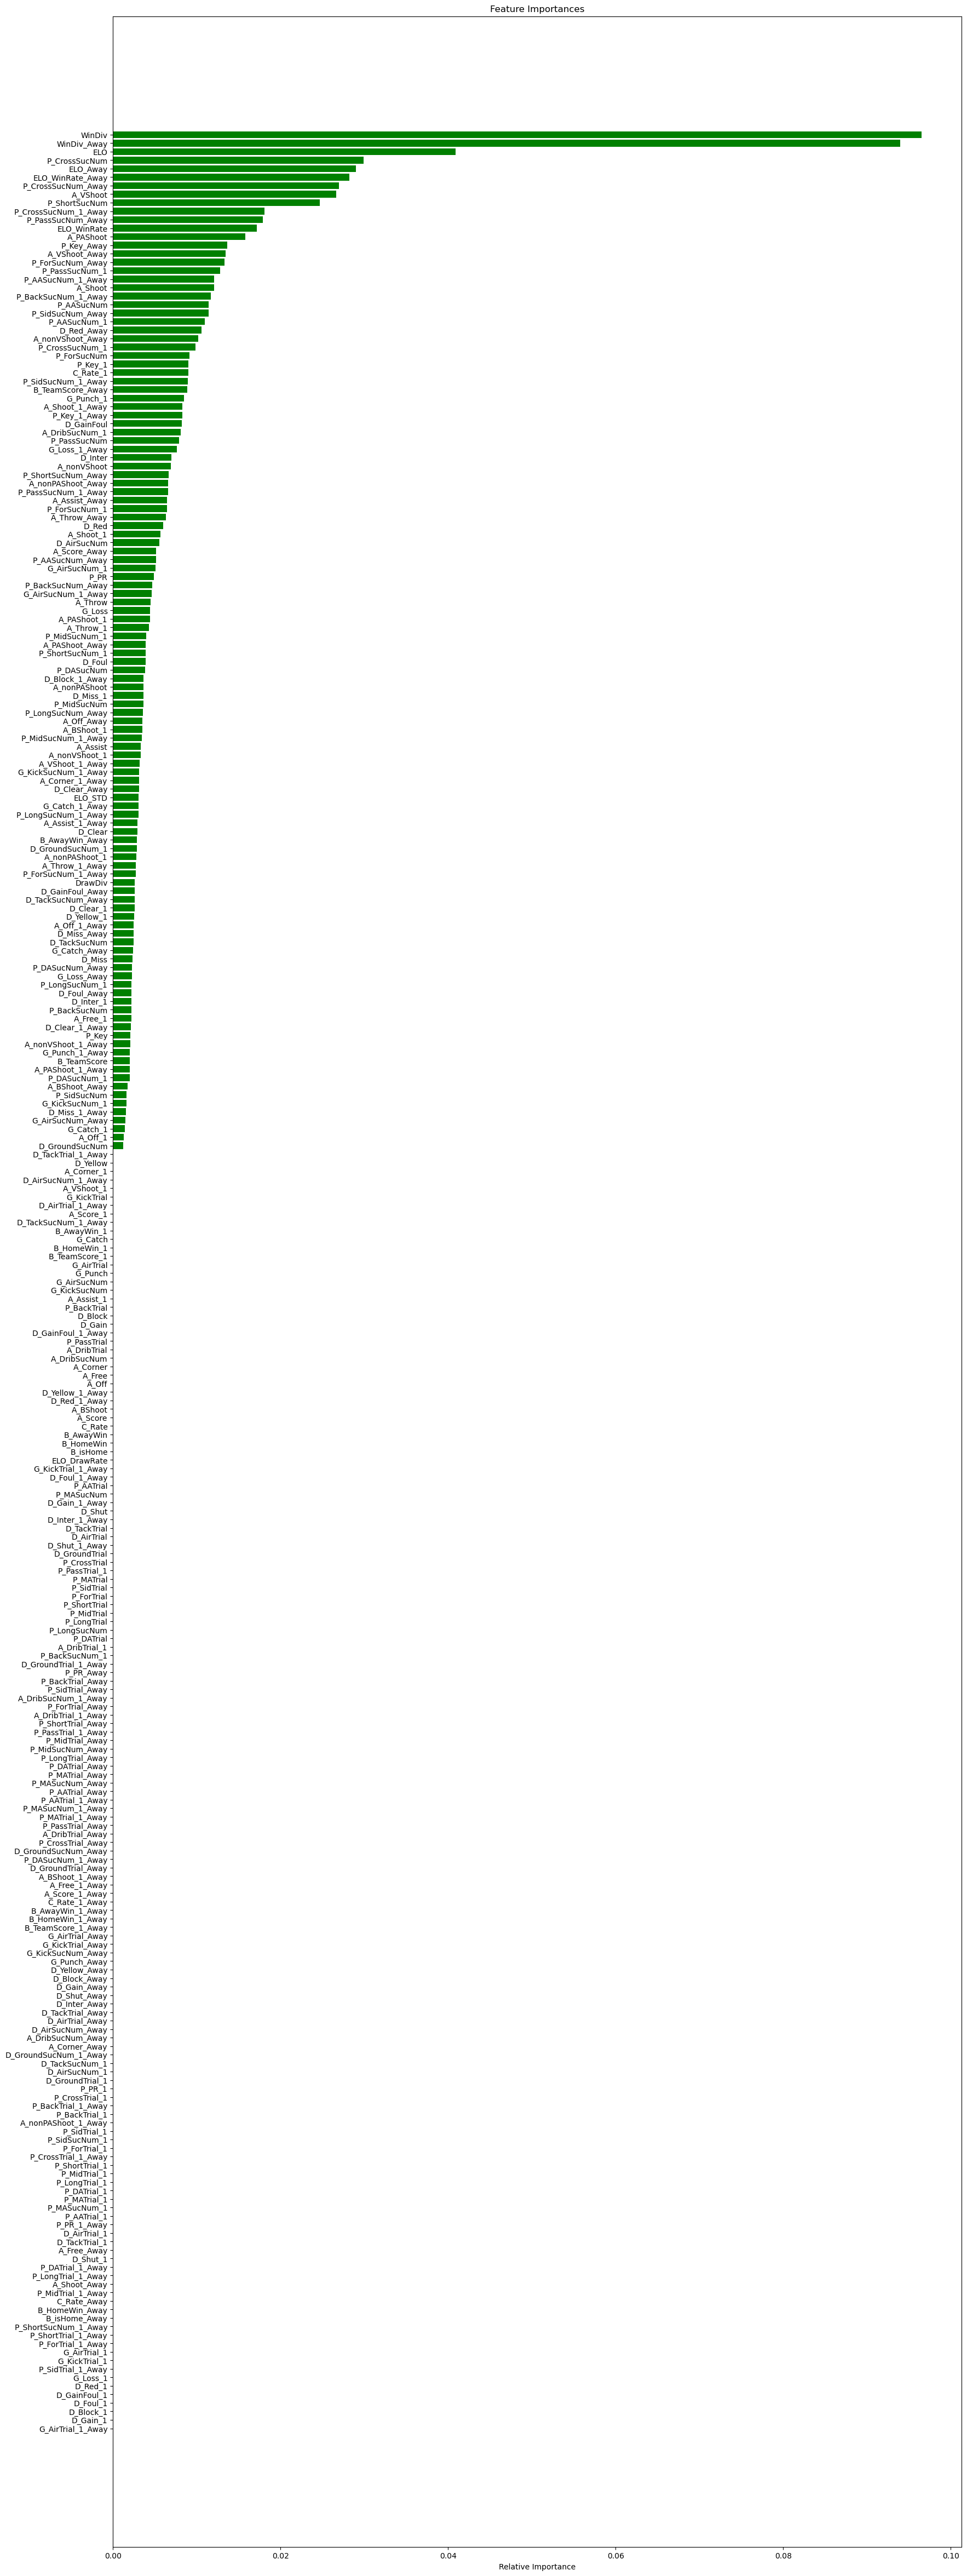

In [29]:
from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier(max_depth=2, random_state=0)
cls.fit(X_train, y_train)

importances = cls.feature_importances_
indices = np.argsort(importances)
features = FSdata.columns
plt.figure(figsize=(20,60))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [219]:
len(features)

272

In [30]:
for i in range(len(features)):
    if features[i] == 'D_GroundSucNum':
        idxnum = i
        print(i)

49


In [31]:
for i in range(len(importances)):
    if i==idxnum:
        print(importances[i])

0.0011843230829244264


In [32]:
validx = list()
for i in range(len(importances)):
    feat = features.tolist()[:-1]
    impt = importances.tolist()[i]
    if impt >= importances[idxnum]:
        validx.append(i)

In [33]:
selected_features = list()
for i in validx:
    selected_features.append(features[i])

selected_features

['ELO',
 'ELO_WinRate',
 'ELO_STD',
 'WinDiv',
 'DrawDiv',
 'B_TeamScore',
 'A_Assist',
 'A_Shoot',
 'A_VShoot',
 'A_nonVShoot',
 'A_PAShoot',
 'A_nonPAShoot',
 'A_Throw',
 'P_PassSucNum',
 'P_Key',
 'P_AASucNum',
 'P_DASucNum',
 'P_MidSucNum',
 'P_ShortSucNum',
 'P_ForSucNum',
 'P_SidSucNum',
 'P_BackSucNum',
 'P_CrossSucNum',
 'P_PR',
 'D_GroundSucNum',
 'D_AirSucNum',
 'D_TackSucNum',
 'D_Clear',
 'D_Inter',
 'D_Miss',
 'D_Foul',
 'D_GainFoul',
 'D_Red',
 'G_Loss',
 'C_Rate_1',
 'A_Shoot_1',
 'A_BShoot_1',
 'A_nonVShoot_1',
 'A_PAShoot_1',
 'A_nonPAShoot_1',
 'A_Off_1',
 'A_Free_1',
 'A_Throw_1',
 'A_DribSucNum_1',
 'P_PassSucNum_1',
 'P_Key_1',
 'P_AASucNum_1',
 'P_DASucNum_1',
 'P_LongSucNum_1',
 'P_MidSucNum_1',
 'P_ShortSucNum_1',
 'P_ForSucNum_1',
 'P_CrossSucNum_1',
 'D_GroundSucNum_1',
 'D_Clear_1',
 'D_Inter_1',
 'D_Miss_1',
 'D_Yellow_1',
 'G_Catch_1',
 'G_Punch_1',
 'G_KickSucNum_1',
 'G_AirSucNum_1',
 'ELO_Away',
 'ELO_WinRate_Away',
 'WinDiv_Away',
 'B_TeamScore_Away',
 

##### SHAP Summary Plot

In [558]:
!pip install shap
import shap

In [559]:
explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(X)

In [560]:
class_names = y.unique().tolist()

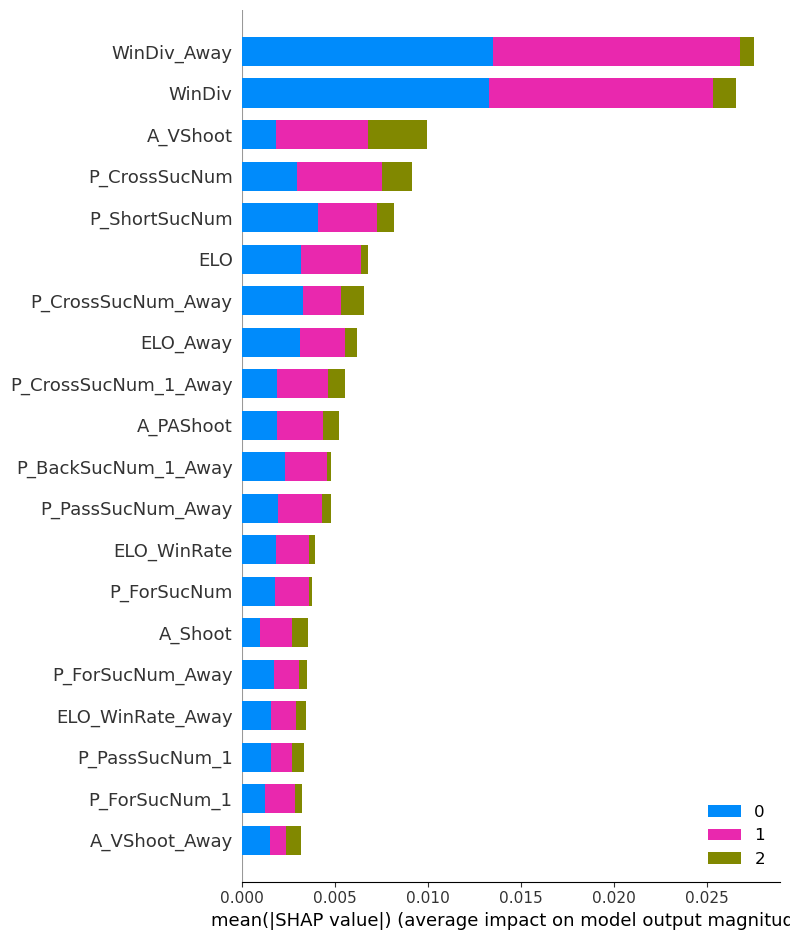

In [561]:
shap.summary_plot(shap_values, X.values, plot_type="bar", 
                  class_names= class_names, feature_names = X.columns)

##### Selection*****************************

In [34]:
len(selected_features)

120

In [225]:
df = data.iloc[:,:5]
df['Proto'] = data['Proto']
for idx in selected_features:
    df[idx] = data[idx]
df['Result'] = data['Result']
data = df

## 최종 점검(여기서부터 다 들어감)-----------------------

In [226]:
proto = data['Proto']
data.drop('Proto', axis = 1, inplace = True)

In [227]:
data = data[data.index%2==0]

In [228]:
# 날짜 인덱스화
data.index = data['B_Date']
data.drop('B_Date', axis = 1, inplace = True)

In [229]:
dv = data['Result']


# 4. 모델링

### 1) Train/Test Split

In [230]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = data.copy()
y = X.pop('Result')

scaled_data = scaler.fit_transform(X.select_dtypes(exclude=["object", "category"]))
df_scaled = pd.DataFrame(data=scaled_data, columns=X.select_dtypes(exclude=['object', 'category']).columns)
X = df_scaled.copy()

In [231]:
data.shape

(618, 125)

In [232]:
yearindex = len(data[data.index<'2023-01-01'])
X_train = X.iloc[:yearindex,:] # before 2023 / from 2023
y_train = y[:yearindex]
X_test = X.iloc[yearindex:, :]
y_test = y[yearindex:]

len(X_train)/len(data) # 분할비율은 8:2 정도

0.7961165048543689

In [233]:
print(X_train.shape, X_test.shape)

(492, 120) (126, 120)


### 2) ML Fitting

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier



from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, r2_score

In [37]:
def WLwrongclf(cm):
    realloss = cm[0].sum()
    lossbutpredwin = cm[2][0]
    realwin = cm[2].sum()
    winbutpredloss = cm[0][2]
    return round(lossbutpredwin/realloss+winbutpredloss/realwin, 2)

In [40]:
np.random.seed(42)

# NB
NB = MultinomialNB().fit(X_train, y_train)
y_predicted = NB.predict(X_test)
print(' \n confusion_matrix (Naive Bayesian) \n ')
cm = confusion_matrix(y_test, y_predicted)
print(cm)
print('----------------')
print('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# DT
DT = tree.DecisionTreeClassifier(random_state = 10).fit(X_train, y_train)
y_predicted= DT.predict(X_test)
print (' \n confusion_matrix (Decision Tree) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# SGD
SGD = SGDClassifier(alpha=.0001).fit(X_train, y_train)
y_predicted = SGD.predict(X_test)
print (' \n confusion_matrix (SGD) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# SVM
SVM = LinearSVC().fit(X_train, y_train)
y_predicted = SVM.predict(X_test)
print (' \n confusion_matrix (SVM)\n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# RF
RFA = RandomForestClassifier(n_estimators=10)
RFA.fit(X_train, y_train)
y_predicted = RFA.predict(X_test)
print (' \n confusion_matrix (RandomForest) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# LR
Logi = LogisticRegression(multi_class = 'multinomial')
Logi.fit(X_train, y_train)
y_predicted = Logi.predict(X_test)
print (' \n confusion_matrix (Logistic Regression) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# adaBoost
model_cand = AdaBoostClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (AdaBoost) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# GBM
model_cand = GradientBoostingClassifier(random_state=5)
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (GBM) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# LightGBM
model_cand = LGBMClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (LightGBM) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# elasticnet
model_cand = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5)
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (ElasticNet) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# KNN
model_cand = KNeighborsClassifier(n_neighbors = 10)
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (KNN) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

y_train = y_train.astype(int)
y_test = y_test.astype(int)

# XGB
model_cand = XGBClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (XGB) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

 
 confusion_matrix (Naive Bayesian) 
 
[[48 16 26]
 [36 12 36]
 [26 16 48]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.53      0.48        90
           1       0.27      0.14      0.19        84
           2       0.44      0.53      0.48        90

    accuracy                           0.41       264
   macro avg       0.38      0.40      0.38       264
weighted avg       0.38      0.41      0.39       264

 
 confusion_matrix (Decision Tree) 
 
[[29 38 23]
 [20 39 25]
 [23 35 32]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.32      0.36        90
           1       0.35      0.46      0.40        84
           2       0.40      0.36      0.38        90

    accuracy                           0.38       264
   macro avg       0.38      0.38      0.38       264
weighted avg       0.38      0.38      0.38       264

 

In [193]:
print('done')

done


In [980]:
model_cand = GradientBoostingClassifier(random_state=5)
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
print(WLwrongclf(cm=cm))

0.33


# 테스트

In [672]:
# Decision Tree
np.random.seed(42)
DT = tree.DecisionTreeClassifier(random_state=10).fit(X_train, y_train)
y_predicted= DT.predict(X_test)
print (' \n confusion_matrix (Decision Tree) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

 
 confusion_matrix (Decision Tree) 
 
[[20  1 14]
 [11 13 17]
 [ 7 15 28]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.57      0.55        35
           1       0.45      0.32      0.37        41
           2       0.47      0.56      0.51        50

    accuracy                           0.48       126
   macro avg       0.48      0.48      0.48       126
weighted avg       0.48      0.48      0.48       126



In [997]:
p = y_predicted.tolist()

In [998]:
r = y[yearindex:].values.astype('int64').tolist()

In [999]:
day = data.index[data.index>'2023-01-01'].tolist()

In [1000]:
hteam = data['B_Team'][yearindex:].values.tolist()

In [1001]:
ateam = data['B_OppTeam'][yearindex:].values.tolist()

In [1002]:
show = pd.DataFrame({'날짜':day, '홈 팀':hteam, '어웨이 팀':ateam, '예측':p, '실제':r})

In [1003]:
show['예측'] = show['예측'].astype('int64')

In [1004]:
show

,날짜,홈 팀,어웨이 팀,예측,실제
0,2023-04-22,서울,수원,2,2
1,2023-04-22,울산,포항,1,1
2,2023-04-22,대구,대전,1,2
3,2023-04-22,인천,수원FC,1,1
4,2023-04-23,광주,강원,1,1
...,...,...,...,...,...
121,2023-08-25,전북,대전,2,1
122,2023-08-26,대구,제주,2,2
123,2023-08-26,강원,포항,0,1
124,2023-08-27,서울,울산,2,1


In [682]:
for i in range(len(show)):
    presult = show.iloc[i,3]
    rresult = show.iloc[i,4]
    if presult==2:
        show.iloc[i,3] = '홈 승'
    elif presult==1:
        show.iloc[i,3] = '무승부'
    else:
        show.iloc[i,3] = '어웨이 승'
        
    if rresult==2:
        show.iloc[i,4] = '홈 승'
    elif rresult==1:
        show.iloc[i,4] = '무승부'
    else:
        show.iloc[i,4] = '어웨이 승'

In [683]:
show

,날짜,홈 팀,어웨이 팀,예측,실제
0,2023-04-22,서울,수원,무승부,홈 승
1,2023-04-22,울산,포항,무승부,무승부
2,2023-04-22,대구,대전,무승부,홈 승
3,2023-04-22,인천,수원FC,무승부,무승부
4,2023-04-23,광주,강원,홈 승,무승부
...,...,...,...,...,...
121,2023-08-25,전북,대전,홈 승,무승부
122,2023-08-26,대구,제주,무승부,홈 승
123,2023-08-26,강원,포항,홈 승,무승부
124,2023-08-27,서울,울산,홈 승,무승부


In [684]:
show.tail(6)

,날짜,홈 팀,어웨이 팀,예측,실제
120,2023-08-25,수원FC,인천,어웨이 승,어웨이 승
121,2023-08-25,전북,대전,홈 승,무승부
122,2023-08-26,대구,제주,무승부,홈 승
123,2023-08-26,강원,포항,홈 승,무승부
124,2023-08-27,서울,울산,홈 승,무승부
125,2023-08-27,광주,수원,홈 승,홈 승


In [147]:
show.to_csv('2023시즌_예측결과3.csv', header = True, index = False, encoding = 'cp949')

Done


# 5. 의사결정 고도화 방안

In [235]:
np.random.seed(42)

model = tree.DecisionTreeClassifier(random_state=10, min_samples_leaf=14
                                   , max_depth = 11).fit(X_train, y_train)
#model = AdaBoostClassifier()
#model = LGBMClassifier()
#model = GradientBoostingClassifier(random_state=5)

model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)
print (classification_report(y_test, y_predicted))
print('승패 오답 지수: ',WLwrongclf(cm=cm))
WDLMatrix = model.predict_proba(X_test)
print(WDLMatrix[:6])

[[17  8 10]
 [12 11 18]
 [ 8  9 33]]
              precision    recall  f1-score   support

           0       0.46      0.49      0.47        35
           1       0.39      0.27      0.32        41
           2       0.54      0.66      0.59        50

    accuracy                           0.48       126
   macro avg       0.46      0.47      0.46       126
weighted avg       0.47      0.48      0.47       126

승패 오답 지수:  0.43
[[0.14285714 0.80952381 0.04761905]
 [0.14285714 0.78571429 0.07142857]
 [0.47368421 0.31578947 0.21052632]
 [0.21428571 0.42857143 0.35714286]
 [0.         0.15       0.85      ]
 [0.         0.22727273 0.77272727]]


In [428]:
r = y[yearindex:].values.astype('int64').tolist()
day = data.index[data.index>'2023-01-01'].tolist()
hteam = data['B_Team'][yearindex:].values.tolist()
ateam = data['B_OppTeam'][yearindex:].values.tolist()
show = pd.DataFrame({'날짜':day, '홈 팀':hteam, '어웨이 팀':ateam , '실제':r})
for i in range(len(show)):
    res = show.iloc[i,3]
    if res > 1:
        show.iloc[i,3] = '홈 승'
    elif res < 1:
        show.iloc[i,3] = '어웨이 승'
    else:
        show.iloc[i,3] = '무승부'
show

,날짜,홈 팀,어웨이 팀,실제
0,2023-04-22,서울,수원,홈 승
1,2023-04-22,울산,포항,무승부
2,2023-04-22,대구,대전,홈 승
3,2023-04-22,인천,수원FC,무승부
4,2023-04-23,광주,강원,무승부
...,...,...,...,...
133,2023-09-16,인천,제주,무승부
134,2023-09-16,포항,수원FC,무승부
135,2023-09-16,울산,대전,무승부
136,2023-09-17,서울,광주,무승부


In [429]:
wrate, drate, lrate = list(), list(), list()
WDLMatrix = model.predict_proba(X_test)
for i in range(len(y_predicted)):
    w = round(WDLMatrix[i][2],6)
    d = round(WDLMatrix[i][1],6)
    l = round(WDLMatrix[i][0],6)
    wrate.append(w)
    drate.append(d)
    lrate.append(l)

In [430]:
show['홈 승 예측치'] = wrate
show['무승부 예측치'] = drate
show['어웨이 승 예측치'] = lrate

In [431]:
show

,날짜,홈 팀,어웨이 팀,실제,홈 승 예측치,무승부 예측치,어웨이 승 예측치
0,2023-04-22,서울,수원,홈 승,0.0476,0.8095,0.1429
1,2023-04-22,울산,포항,무승부,0.0714,0.7857,0.1429
2,2023-04-22,대구,대전,홈 승,0.2105,0.3158,0.4737
3,2023-04-22,인천,수원FC,무승부,0.3571,0.4286,0.2143
4,2023-04-23,광주,강원,무승부,0.8500,0.1500,0.0000
...,...,...,...,...,...,...,...
133,2023-09-16,인천,제주,무승부,1.0000,0.0000,0.0000
134,2023-09-16,포항,수원FC,무승부,0.4737,0.3684,0.1579
135,2023-09-16,울산,대전,무승부,0.4737,0.3684,0.1579
136,2023-09-17,서울,광주,무승부,0.2222,0.2222,0.5556


### 1) 평균+k표준편차 의사결정

In [432]:
def MStdMethod(data, k):
    PredictionList = list()
    # 방안 1: 확률이 m+1표준편차보다 클 때 의사결정
    for i in range(len(show)):
        Hrate = show.iloc[i,4]
        Drate = show.iloc[i,5]
        Arate = show.iloc[i,6]
        maxi = max(Hrate, Drate, Arate)
        mean = np.mean([Hrate, Drate, Arate])
        std = np.std([Hrate, Drate, Arate])
        standard = mean+std*k
        if maxi>standard:
            if maxi==Hrate:
                PredictionList.append('홈 승')
            elif maxi==Drate:
                PredictionList.append('무승부')
            else:
                PredictionList.append('어웨이 승')
        else:
            PredictionList.append('예측포기')
    show['예측'] = PredictionList


    cnt = 1e-16
    cor = 0
    for i in range(len(show)):
        R = show.iloc[i,3]
        P = show.iloc[i,7]
        if P != '예측포기':
            cnt += 1
            if P==R:
                cor += 1
    return round(cor/cnt,2), round(cnt/len(data), 2)

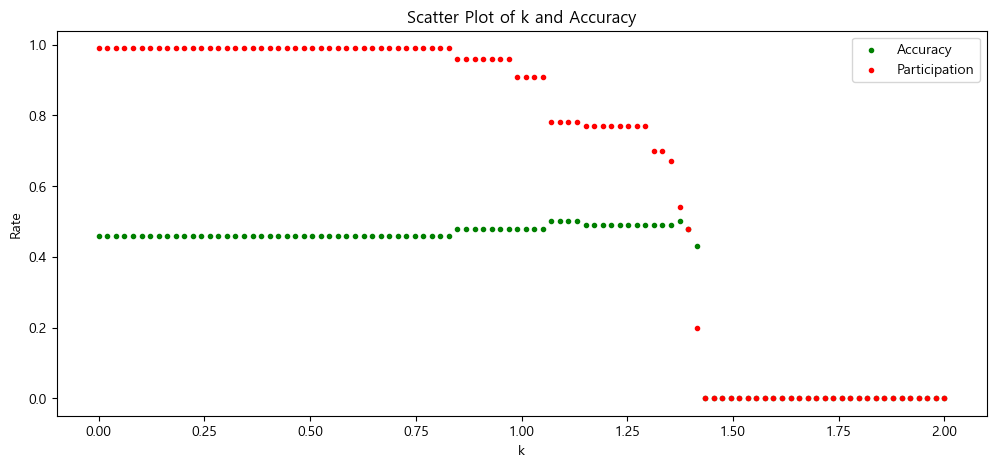

In [371]:
A = np.linspace(0, 2, 100)
B = list()
C = list()
for i in range(100):
    B.append(MStdMethod(data = show, k = A[i])[0])
    C.append(MStdMethod(data = show, k = A[i])[1])
B = np.array(B)
C = np.array(C)

plt.figure(figsize=(12, 5))
plt.scatter(A, B, color='g', marker='.', label='Accuracy')
plt.scatter(A, C, color='r', marker='.', label='Participation')
plt.title('Scatter Plot of k and Accuracy')
plt.xlabel('k')
plt.ylabel('Rate')
plt.legend(loc='best')
plt.show()

In [372]:
MStdMethod(data = show, k = 1.1)

(0.5, 0.78)

In [422]:
show

,날짜,홈 팀,어웨이 팀,실제,홈 승 예측치,무승부 예측치,어웨이 승 예측치
0,2023-04-22,서울,수원,홈 승,0.0476,0.8095,0.1429
2,2023-04-22,대구,대전,홈 승,0.2105,0.3158,0.4737
5,2023-04-23,제주,전북,어웨이 승,0.7727,0.2273,0.0000
6,2023-04-25,포항,수원,홈 승,0.0476,0.8095,0.1429
7,2023-04-25,인천,울산,어웨이 승,0.0667,0.0667,0.8667
...,...,...,...,...,...,...,...
126,2023-09-01,대전,수원FC,어웨이 승,0.4737,0.3684,0.1579
127,2023-09-01,대구,강원,홈 승,0.2222,0.2222,0.5556
128,2023-09-02,수원,서울,어웨이 승,0.0667,0.0667,0.8667
129,2023-09-02,인천,포항,어웨이 승,0.0667,0.0667,0.8667


In [423]:
PredictionList = list()
for i in range(len(show)):
    Hrate = show.iloc[i,4]
    Arate = show.iloc[i,6]
    if Hrate>=Arate:
        PredictionList.append('홈 승')
    elif Arate>Hrate:
        PredictionList.append('어웨이 승')
show['예측'] = PredictionList

In [424]:
show = show[['날짜', '홈 팀', '어웨이 팀', '예측', '실제']]

In [433]:
PredictionList = list()
# 방안 1: 확률이 m+1표준편차보다 클 때 의사결정
for i in range(len(show)):
    Hrate = show.iloc[i,4]
    Drate = show.iloc[i,5]
    Arate = show.iloc[i,6]
    maxi = max(Hrate, Drate, Arate)
    mean = np.mean([Hrate, Drate, Arate])
    std = np.std([Hrate, Drate, Arate])
    standard = mean+std*1.25
    if maxi>standard:
        if maxi==Hrate:
            PredictionList.append('홈 승')
        elif maxi==Drate:
            PredictionList.append('무승부')
        else:
            PredictionList.append('어웨이 승')
    else:
        PredictionList.append('예측포기')
show['예측'] = PredictionList

In [434]:
show[-6:]

,날짜,홈 팀,어웨이 팀,실제,홈 승 예측치,무승부 예측치,어웨이 승 예측치,예측
132,2023-09-16,전북,강원,무승부,0.7500,0.1875,0.0625,홈 승
133,2023-09-16,인천,제주,무승부,1.0000,0.0000,0.0000,홈 승
134,2023-09-16,포항,수원FC,무승부,0.4737,0.3684,0.1579,예측포기
135,2023-09-16,울산,대전,무승부,0.4737,0.3684,0.1579,예측포기
136,2023-09-17,서울,광주,무승부,0.2222,0.2222,0.5556,어웨이 승
137,2023-09-17,수원,대구,무승부,0.2222,0.2222,0.5556,어웨이 승


In [435]:
show.to_csv('23년예측2.csv', header=True, index=False, encoding='cp949')

### 2) 팀 별 성과

##### Ver 1) 한 경기 한 Row

In [437]:
roundnum = []
roundnum2 = []
for a in range(8,31):
    roundnum.append(a)
    
for a in range(23):
    for b in range(6):
        roundnum2.append(roundnum[a])

roundnum = roundnum2

show['라운드'] = roundnum

##### Ver 2) 한 경기 두 Row

In [125]:
roundnum = []
roundnum2 = []
for a in range(8,30):
    roundnum.append(a)
    
for a in range(22):
    for b in range(12):
        roundnum2.append(roundnum[a])

roundnum = roundnum2

show['라운드'] = roundnum

##### Ver 1) 한 경기 한 Row

In [438]:
protonum = [46,46,46,46,46,46,
           47,47,48,48,48,48,
           49,49,49,49,49,49,
           51,51,52,52,52,52,
           53,53,53,54,54,54,
           55,55,55,55,55,55,
           58,58,58,58,58,58,
           61,61,61,61,61,61,
           64,64,64,64,64,64,
           65,65,66,66,66,66,
           67,67,67,67,67,67,
           73,73,73,73,73,73,
           76,76,76,76,76,76,
           79,79,79,79,79,79,
           80,80,80,80,80,80,
           81,81,81,81,81,81,
           84,84,84,84,84,84,
           90,90,90,90,90,90,
           93,93,93,93,93,93,
           96,96,96,96,96,96,
           99,99,99,99,99,99,
           102,102,102,102,102,102,
           '','','','','','']
show['회 차'] = protonum

##### Ver 2) 한 경기 두 Row

In [126]:
protonum = [46,46,46,46,46,46,
            46,46,46,46,46,46,
            47,47,47,47,
            48,48,48,48,
            48,48,48,48,
            49,49,49,49,49,49,
            49,49,49,49,49,49,
           51,51,51,51,
            52,52,52,52,
            52,52,52,52,
           53,53,53,
            53,53,53,
            54,54,54,
             54,54,54,
           55,55,55,55,55,55,
            55,55,55,55,55,55,
           58,58,58,58,58,58,
            58,58,58,58,58,58,
           61,61,61,61,61,61,
            61,61,61,61,61,61,
           64,64,64,64,64,64,
            64,64,64,64,64,64,
           65,65,65,65,
            66,66,66,66,
            66,66,66,66,
           67,67,67,67,67,67,
            67,67,67,67,67,67,
           73,73,73,73,73,73,
            73,73,73,73,73,73,
           76,76,76,76,76,76,
            76,76,76,76,76,76,
           79,79,79,79,79,79,
            79,79,79,79,79,79,
           80,80,80,80,80,80,
            80,80,80,80,80,80,
           81,81,81,81,81,81,
            81,81,81,81,81,81,
           84,84,84,84,84,84,
            84,84,84,84,84,84,
           90,90,90,90,90,90,
            90,90,90,90,90,90,
           93,93,93,93,93,93,
            93,93,93,93,93,93,
           96,96,96,96,96,96,
            96,96,96,96,96,96,
           99,99,99,99,99,99,
            99,99,99,99,99,99,
           102,102,102,102,102,102,102,102,102,102,102,102]
show['회 차'] = protonum

In [439]:
show.tail(6)

,날짜,홈 팀,어웨이 팀,실제,홈 승 예측치,무승부 예측치,어웨이 승 예측치,예측,라운드,회 차
132,2023-09-16,전북,강원,무승부,0.7500,0.1875,0.0625,홈 승,30,
133,2023-09-16,인천,제주,무승부,1.0000,0.0000,0.0000,홈 승,30,
134,2023-09-16,포항,수원FC,무승부,0.4737,0.3684,0.1579,예측포기,30,
135,2023-09-16,울산,대전,무승부,0.4737,0.3684,0.1579,예측포기,30,
136,2023-09-17,서울,광주,무승부,0.2222,0.2222,0.5556,어웨이 승,30,
137,2023-09-17,수원,대구,무승부,0.2222,0.2222,0.5556,어웨이 승,30,


In [406]:
1.5*2.19*1.95*2.5*3.4*2.44*5*0.78

518.1354944999999

In [413]:
show

,날짜,라운드,회 차,홈 팀,어웨이 팀,예측,실제
0,2023-04-22,8,46,서울,수원,무승부,홈 승
1,2023-04-22,8,46,울산,포항,무승부,무승부
2,2023-04-22,8,46,대구,대전,어웨이 승,홈 승
3,2023-04-22,8,46,인천,수원FC,예측포기,무승부
4,2023-04-23,8,46,광주,강원,홈 승,무승부
...,...,...,...,...,...,...,...
133,2023-09-16,30,,인천,제주,홈 승,무승부
134,2023-09-16,30,,포항,수원FC,예측포기,무승부
135,2023-09-16,30,,울산,대전,예측포기,무승부
136,2023-09-17,30,,서울,광주,어웨이 승,무승부


In [414]:
sportsai = show[show['실제']!='무승부']

In [415]:
sportsai = sports

,날짜,라운드,회 차,홈 팀,어웨이 팀,예측,실제
0,2023-04-22,8,46,서울,수원,무승부,홈 승
2,2023-04-22,8,46,대구,대전,어웨이 승,홈 승
5,2023-04-23,8,46,제주,전북,홈 승,어웨이 승
6,2023-04-25,9,47,포항,수원,무승부,홈 승
7,2023-04-25,9,47,인천,울산,어웨이 승,어웨이 승
...,...,...,...,...,...,...,...
126,2023-09-01,29,102,대전,수원FC,예측포기,어웨이 승
127,2023-09-01,29,102,대구,강원,어웨이 승,홈 승
128,2023-09-02,29,102,수원,서울,어웨이 승,어웨이 승
129,2023-09-02,29,102,인천,포항,어웨이 승,어웨이 승


### 3) 프로토 회 차 별 결과

In [442]:
acc = [20, 50, 66.66, 33.33, 50, 33.33, 
      50, 100, 25, 50, 100, 25, 100,
      100, 80, 25, 60, 100, 16.67,
      60,100,16.67, 40,20, 60, 40]

In [444]:
f = pd.DataFrame({'Betting Accuracy':acc})

In [447]:
f

,Betting Accuracy
0,20.0000
1,50.0000
2,66.6600
3,33.3300
4,50.0000
5,33.3300
6,50.0000
7,100.0000
8,25.0000
9,50.0000


In [453]:
f['Proto'] = [46,47,48,49,51,52,53,54,55,58,61,64,65,
             66,67,73,76,79,80,81,84,90,93,96,99,102]

[(0.0, 110.0), Text(0.5, 1.0, 'Betting Accuracy')]

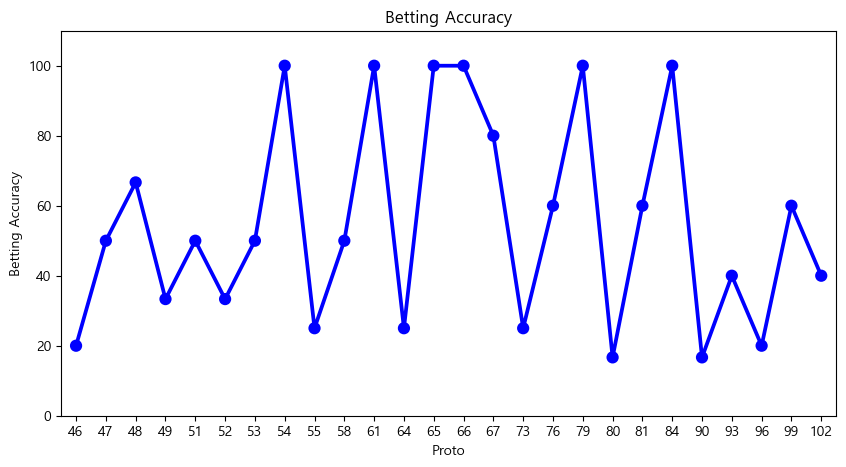

In [480]:
plt.figure(figsize=(10,5))
sns.pointplot(x = 'Proto', y = 'Betting Accuracy', data = f, color='blue').set(ylim=(0,110), title="Betting Accuracy")

In [128]:
CorrData = show.copy()
WrongData = show.copy()
Corridx = list()
Wrongidx = list()

for i in range(len(show)):
    pred = show.iloc[i,5]
    res = show.iloc[i,6]
    if pred=='예측포기':
        Corridx.append(i)
        Wrongidx.append(i)
    if pred==res:
        Corridx.append(i)
    else:
        Wrongidx.append(i)

CorrData.drop(Wrongidx, axis = 0, inplace = True)
WrongData.drop(Corridx, axis = 0, inplace = True)

In [129]:
show

,날짜,라운드,회 차,홈 팀,어웨이 팀,예측,실제
0,2023-04-22,8,46,서울,수원,예측포기,홈 승
1,2023-04-22,8,46,수원,서울,어웨이 승,어웨이 승
2,2023-04-22,8,46,울산,포항,어웨이 승,무승부
3,2023-04-22,8,46,포항,울산,어웨이 승,무승부
4,2023-04-22,8,46,대구,대전,무승부,홈 승
...,...,...,...,...,...,...,...
259,2023-09-02,29,102,포항,인천,예측포기,홈 승
260,2023-09-03,29,102,울산,광주,홈 승,어웨이 승
261,2023-09-03,29,102,광주,울산,무승부,홈 승
262,2023-09-03,29,102,제주,전북,어웨이 승,무승부


In [85]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'


<Axes: xlabel='홈 팀', ylabel='count'>

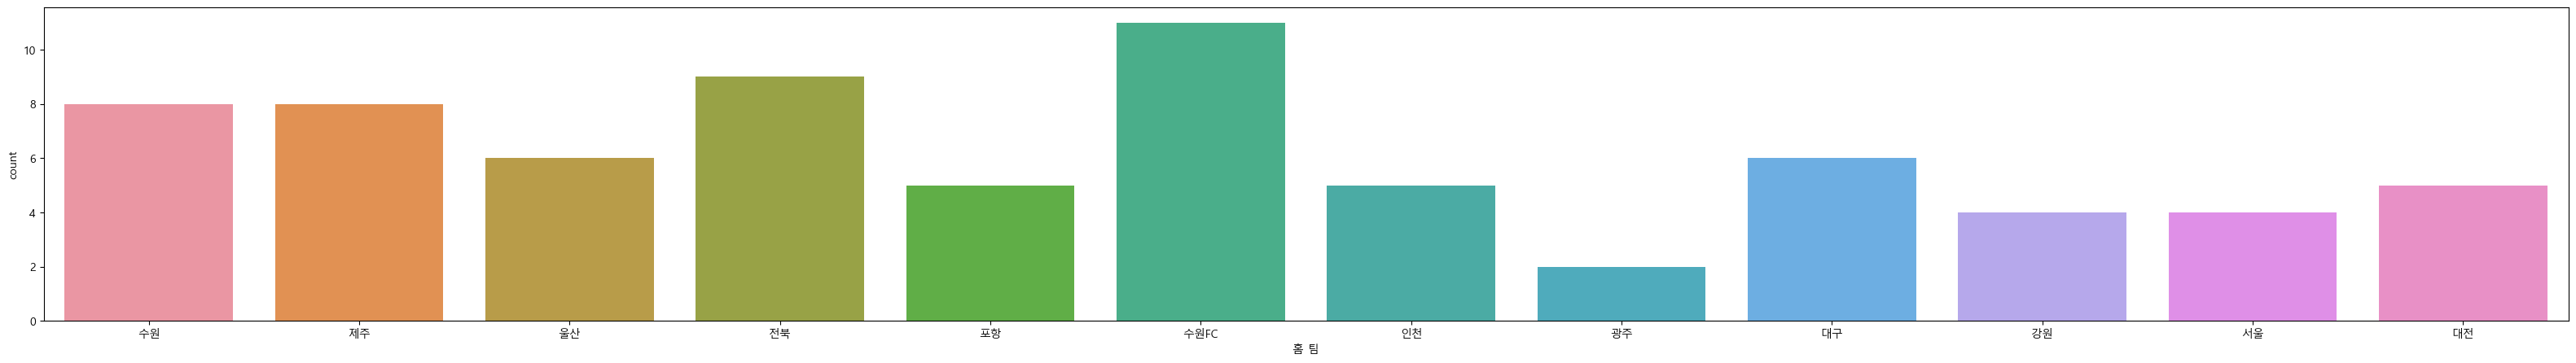

In [134]:
plt.figure(figsize = (40,5))
sns.countplot(x = CorrData['홈 팀'])

<Axes: xlabel='어웨이 팀', ylabel='count'>

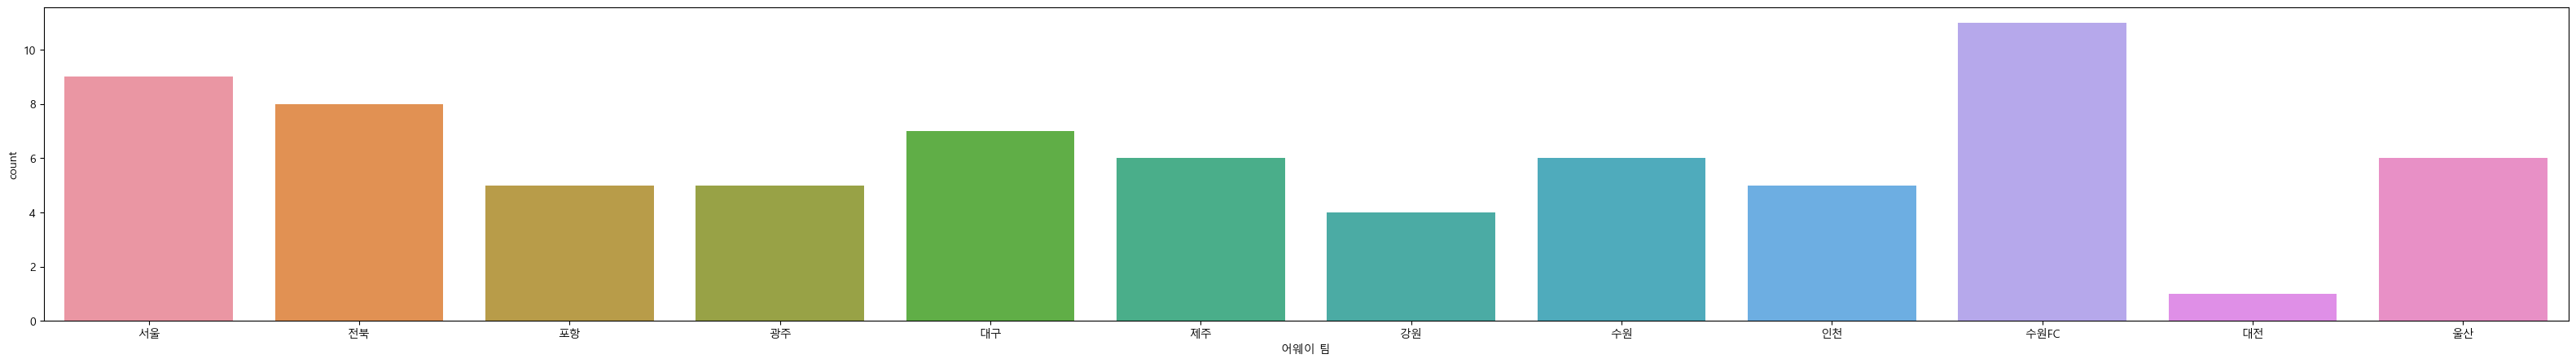

In [135]:
plt.figure(figsize = (40,5))
sns.countplot(x = CorrData['어웨이 팀'])

<Axes: xlabel='어웨이 팀', ylabel='count'>

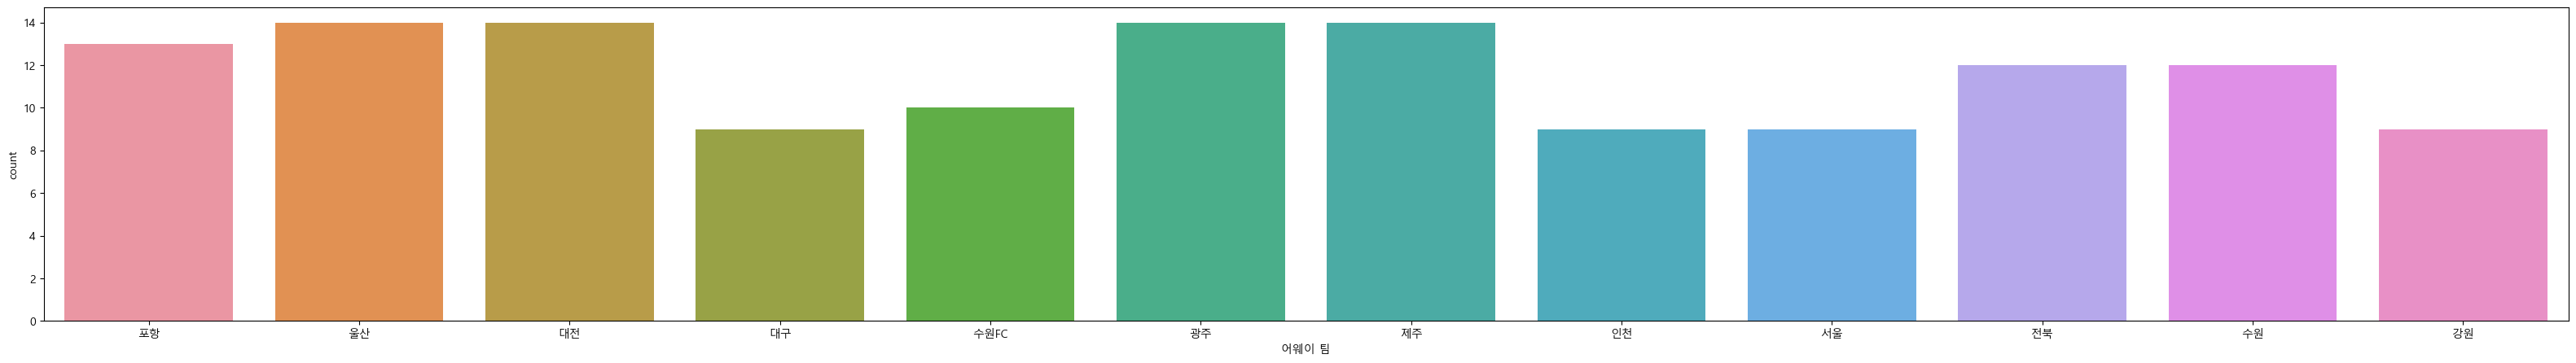

In [136]:
plt.figure(figsize = (40,5))
sns.countplot(x = WrongData['어웨이 팀'])

<Axes: xlabel='홈 팀', ylabel='count'>

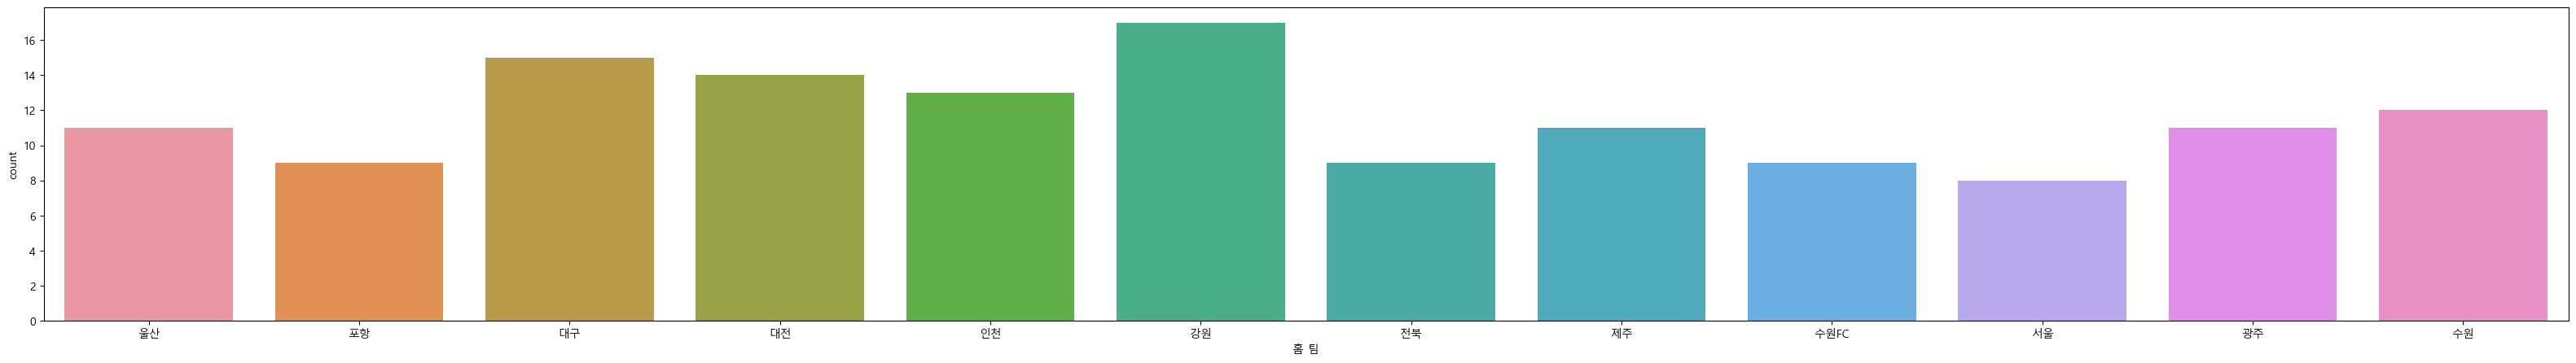

In [137]:
plt.figure(figsize = (40,5))
sns.countplot(x = WrongData['홈 팀'])

### 3) 라운드 별 성과

### 3) DL Fitting

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = data.copy()
y = X.pop('Goals')

scaled_data = scaler.fit_transform(X.select_dtypes(exclude=["object", "category"]))
df_scaled = pd.DataFrame(data=scaled_data, columns=X.select_dtypes(exclude=['object', 'category']).columns)
X = df_scaled.copy()

X_train = X.iloc[:yearindex, :] #before 2023, after2023
y_train = y[:yearindex]
X_test = X.iloc[yearindex:, :]
y_test = y[yearindex:]
X_train = X_train.values.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.values.reshape((X_test.shape[0],X_test.shape[1],1))
y_train = y_train.values.reshape((y_train.shape[0], 1))
y_test = y_test.values.reshape((y_test.shape[0], 1))
y_train = y_train.astype('int')
y_test = y_test.astype('int')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [160]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, GRU, LSTM, Conv2D
from keras.optimizers import SGD

import tensorflow as tf

In [ ]:
### cnn
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,1), padding='same', activation='relu', input_shape=(X_train.shape[1],1,1)),
    tf.keras.layers.MaxPooling2D((2,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='linear') # 회귀니까
])
cnn.compile(optimizer='adam', metrics=['mae'],loss='mse')
cnn.fit(X_train, y_train, epochs=20, verbose = 0)
y_pred_cnn = cnn.predict(X_test)

In [ ]:
lstm = Sequential()   # 레이어를 선형으로 연결하여 구성
lstm.add(LSTM(
    units = 32,
    return_sequences = True,
    input_shape = (X_train.shape[1], 1),
    activation = 'tanh'
))
lstm.add(LSTM(units = 5, activation = 'tanh')) # 두 번째 이후 레이어들은 자동으로 형태를 추정할 수 있기에 형태 정보 X
lstm.add(Dense(units=1, activation = 'linear')) # 입력 뉴런과 출력 뉴런을 연결하는 전결합층
lstm.compile(optimizer = SGD(lr = 0.01, decay = 1e-7,
                             momentum = 0.9, nesterov = False),
             loss = 'mean_squared_error')
lstm.fit(X_train, y_train, epochs = 20, verbose = 1) # 에폭스 50이면 whole data를 50번 학습
y_pred_lstm = lstm.predict(X_test)

In [ ]:
### GRU
gru = Sequential()   # 레이어를 선형으로 연결하여 구성
gru.add(GRU(
    units = 50,
    return_sequences = True,
    input_shape = (X_train.shape[1], 1),
    activation = 'tanh'
))
gru.add(GRU(units = 5, activation = 'tanh')) # 두 번째 이후 레이어들은 자동으로 형태를 추정할 수 있기에 형태 정보 X
gru.add(Dense(units=1, activation = 'linear')) # 입력 뉴런과 출력 뉴런을 연결하는 전결합층
gru.compile(optimizer = SGD(lr = 0.01, decay = 1e-7,
                            momentum = 0.9, nesterov = False),
            loss = 'mean_squared_error')

gru.fit(X_train, y_train, epochs = 50, verbose = 0)
y_pred_gru = gru.predict(X_test)

In [ ]:
### RNN
rnn = Sequential() 
rnn.add(SimpleRNN(
    units = 32,
    return_sequences = True,
    input_shape = (X_train.shape[1], 1),
    activation = 'tanh'
))
rnn.add(SimpleRNN(units = 5, activation = 'tanh'))
rnn.add(Dense(units=1, activation = 'linear'))
rnn.compile(optimizer = SGD(lr = 0.01, decay = 1e-7,
                            momentum = 0.9, nesterov = False),
            loss = 'mean_squared_error')
rnn.fit(X_train, y_train, epochs = 50, verbose = 1)
y_pred_rnn = rnn.predict(X_test)

In [ ]:
print('CNN')
print (classification_report(y_test, y_pred_cnn))
print('----------------------------------------------')
print('LSTM')
print (classification_report(y_test, y_pred_lstm))
print('----------------------------------------------')
print('GRU')
print (classification_report(y_test, y_pred_gru))
print('----------------------------------------------')
print('RNN')
print (classification_report(y_test, y_pred_rnn))
print('----------------------------------------------')